# Exploratory Data Analysis & Visualisations

# 0. Required Packages: 

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load datasets

## > Load `cluster_df_08`
- This includes: event clusters (0.8 cosine similarity cutoff) and corresponding articles and urls 

In [3]:
cluster_df = pd.read_csv("cluster_df_08.csv")

In [4]:
cluster_df.head()

,Unnamed: 0,docs,entities,document_embedding,pub_date,url,title,entity,ent_type,clustNum,key
0,0,Roglic wint tweede rit in Vuelta na titanenstr...,"('Roglic', 'PERSON')","[0.053201865404844284, -0.10651081055402756, 0...",2021-08-25,https://nos.nl/liveblog/2395073-peloton-geeft-...,Peloton geeft kopgroep weinig ruimte • Gaat Ro...,Roglic,PERSON,823,Roglic wint tweede rit in Vuelta na titanenstr...
1,1,Baudet moet tweets met Holocaustvergelijking v...,"('Holocaustvergelijking', 'PERSON')","[0.04592348262667656, -0.041734352707862854, 0...",2021-12-23,https://www.nu.nl/algemeen/6173365/baudet-moet...,Baudet moet tweets met Holocaustvergelijking v...,Holocaustvergelijking,PERSON,71,Baudet moet tweets met Holocaustvergelijking v...
2,2,Fotofinish beslist Amstel Gold Race: Kwiatkows...,"('Gold Race', 'EVENT')","[-0.053654856979846954, -0.0793352797627449, -...",2022-04-10,https://www.ad.nl/wielrennen/live-schelling-in...,"LIVE | Schelling in kopgroep, Van der Poel top...",Gold Race,EVENT,3,Fotofinish beslist Amstel Gold Race: Kwiatkows...
3,3,Wielrennen: Amstel Gold Race voor mannen Tip d...,"('Amstel Gold Race', 'EVENT')","[-0.0038247040938585997, -0.06538179516792297,...",2022-04-10,https://nos.nl/livestream/2424240-wielrennen-a...,Wielrennen: Amstel Gold Race voor mannen | NOS,Amstel Gold Race,EVENT,4,Wielrennen: Amstel Gold Race voor mannen Tip d...
4,4,Johnny Depp trekt aan langste eind in smaadzaa...,"('Johnny Depp', 'PERSON')","[0.0008818341884762049, -0.028261566534638405,...",2022-06-01,https://nos.nl/artikel/2431089-johnny-depp-tre...,Johnny Depp trekt aan langste eind in smaadzaa...,Johnny Depp,PERSON,178,Johnny Depp trekt aan langste eind in smaadzaa...


In [5]:
len(cluster_df)

2881

## > Load the `labelled_08` dataset
- This includes: the labelled event clusters and corresponding articles, urls and event duration

In [6]:
labelled = pd.read_csv("labelled_08.csv")

In [7]:
labelled.head()

,Unnamed: 0.1,Unnamed: 0,clustNum,ent_types,entities,unique_article_count,cluster_titles,cluster_docs,Negativity_Label,Positive_Development_Topic,Neutral_Title_Judgment,Event_Topic,cluster_date_min,cluster_date_max,cluster_date_range
0,0,0,0,['PERSON' 'EVENT'],['Sandra' 'Vrienden van Amstel' 'Anouk' 'Emma ...,2,['Splinter kruipt eindelijk achter het stuur e...,['Splinter kruipt eindelijk achter het stuur e...,0.0,NaN,NaN,0,2022-01-09,2022-01-09,0 days
1,0,1,1,['PERSON' 'EVENT' 'NORP'],['Hari' 'Ahoy' 'Pool' 'GLORY' 'Arek Wrzosek' '...,2,['Badr Hari lijdt pijnlijke nederlaag in Ahoy ...,['Badr Hari lijdt pijnlijke nederlaag in Ahoy ...,0.0,NaN,NaN,Sports,2021-09-05,2021-09-05,0 days
2,1,2,2,['NORP' 'EVENT' 'PERSON'],['Rotterdams' 'American Dream' 'Ronnie Flex'],9,['Deze leuke dingen doe je dit weekend in Rott...,['Pagina 3 – indebuurt Rotterdam Crazy Sexy Co...,0.0,NaN,NaN,Local_Recommendations,2022-08-04,2022-08-06,2 days
3,2,3,3,['EVENT' 'PERSON' 'NORP'],['Gold Race' 'Kwiatkowski' 'Benoît Cosnefroy' ...,2,"['LIVE | Schelling in kopgroep, Van der Poel t...",['Fotofinish beslist Amstel Gold Race: Kwiatko...,0.0,NaN,NaN,Sports,2022-04-10,2022-04-11,1 days
4,1,4,4,['EVENT'],['Amstel Gold Race'],2,['Wielrennen: Amstel Gold Race voor mannen | N...,['Wielrennen: Amstel Gold Race voor mannen Tip...,0.0,NaN,NaN,0,2022-04-10,2022-04-10,0 days


In [8]:
len(labelled)

880

## > Load the `survey_urls`
- This includes: survey items and corresponding urls

In [9]:
survey = pd.read_csv("survey_urls.csv")

In [10]:
survey.head()

,Unnamed: 0,submission_id,dangerous_world,people_take_advantage,careful_with_people,Q13_trust_general_1,dws_all,dangerous_world_c,dangerous_world_q,social_distrust,...,source,url,domain,title,channel,query,words,collected,n_deleted,depth
0,0,js120,2.0,3.0,6.0,7.0,3.0,Below 1 SD,q1,3.333333,...,NaN,https://drimble.nl/entertainment/showbizz/4645...,drimble.nl,404 Page not found,NaN,NaN,NaN,2022-08-20 13:50:47.223944+00:00,0,4.0
1,1,js120,2.0,3.0,6.0,7.0,3.0,Below 1 SD,q1,3.333333,...,NaN,https://www.ad.nl/andere-sporten/ophef-in-belg...,ad.nl,Ophef in België: ‘3x3-basketballers plaatsten ...,NaN,NaN,NaN,2022-08-20 13:50:47.203972+00:00,0,3.0
2,2,js120,2.0,3.0,6.0,7.0,3.0,Below 1 SD,q1,3.333333,...,NaN,https://nos.nl/liveblog/2395073-peloton-geeft-...,nos.nl,Peloton geeft kopgroep weinig ruimte • Gaat Ro...,NaN,NaN,NaN,2022-08-20 13:50:47.203621+00:00,0,2.0
3,3,js120,2.0,3.0,6.0,7.0,3.0,Below 1 SD,q1,3.333333,...,NaN,https://www.ad.nl/binnenland/wachttijden-zieke...,ad.nl,Wachttijden ziekenhuis lopen nog altijd op: ‘S...,NaN,NaN,NaN,2022-08-20 13:50:47.170360+00:00,0,3.0
4,4,js120,2.0,3.0,6.0,7.0,3.0,Below 1 SD,q1,3.333333,...,NaN,https://nos.nl/,nos.nl,"NOS.nl - Nieuws, Sport en Evenementen | Nederl...",NaN,NaN,NaN,2022-08-20 13:50:47.161326+00:00,0,1.0


In [11]:
len(survey)

64397

# 2. Merge & clean datasets 

In [12]:
# select only required columns
lab = labelled[["clustNum", "Negativity_Label", "Event_Topic", "cluster_date_range"]]

clust = cluster_df[["clustNum", "docs", "pub_date", "url"]]

In [14]:
# merge to obtain negativity labels for the clusters
events = pd.merge(clust, lab, on = "clustNum", how = "inner")

In [15]:
events.head(2)

,clustNum,docs,pub_date,url,Negativity_Label,Event_Topic,cluster_date_range
0,823,Roglic wint tweede rit in Vuelta na titanenstr...,2021-08-25,https://nos.nl/liveblog/2395073-peloton-geeft-...,0.0,NaN,11 days
1,823,Roglic wint titanenstrijd in de bergen en hero...,2021-09-01,https://nos.nl/liveblog/2396010-titanenstrijd-...,0.0,NaN,11 days


In [17]:
# Check for NA's
na_events = events[events["Negativity_Label"].isna()==True]

len(na_events)

20

In [18]:
# Remove NA's & invalid cases (-99 and -2)
events = events.dropna(subset=["Negativity_Label"])
events = events[(events["Negativity_Label"] != -99) & (events["Negativity_Label"] != -2)].reset_index(drop=True)

In [21]:
# join this to the survey_urls, only retain where URLs in survey data and event data correspond (for now)
events_survey = pd.merge(survey, events, on = "url", how = "inner")

len(events_survey)

3180

In [22]:
# we see it has ~600 urls that appear several times across users.
events_survey["url"].nunique()

2576

In [23]:
# number of unique event clusters
events_survey["clustNum"].nunique()

762

# 3. Explore patterns of news use

## > 3.1 Event descriptives

In [23]:
# Grouping df by event and getting some relevant descriptives
df_overview = events_survey.groupby(["clustNum"]).agg(
    
    # unique urls per event
    unique_urls = ("url", "nunique"), 
    
    # unique articles per event
    unique_docs = ("docs", "nunique"), 
    
    # calculate min & max dates per event
    cluster_date_min = ("pub_date", "min"), 
    cluster_date_max = ("pub_date", "max")).reset_index()

# get date ranges
date_columns = ["cluster_date_min", "cluster_date_max"]
df_overview[date_columns] = df_overview[date_columns].apply(pd.to_datetime, format='%Y-%m-%d') # convert format to datetime 
df_overview["cluster_date_range"] = df_overview["cluster_date_max"]-df_overview["cluster_date_min"] # calculate date ranges

# Get an ovevriew of the data. As there's one event per row, aggregate to obtain event descriptives.
df_desc = df_overview.agg(
    mean_event_duration = ("cluster_date_range", "mean"),
    max_event_duration = ("cluster_date_range", "max"), 
    min_event_duration = ("cluster_date_range", "min"), 
    mean_unique_articles = ("unique_docs", "mean"), 
    max_unique_articles = ("unique_docs", "max"), 
    min_unique_articles = ("unique_docs", "min"), 
    mean_unique_urls = ("unique_urls", "mean"),
    max_unique_urls = ("unique_urls", "max"),
    min_unique_urls = ("unique_urls", "min"))

df_desc

,cluster_date_range,unique_docs,unique_urls
mean_event_duration,1 days 11:10:51.968503937,NaN,NaN
max_event_duration,26 days 00:00:00,NaN,NaN
min_event_duration,0 days 00:00:00,NaN,NaN
mean_unique_articles,NaT,3.380577,NaN
max_unique_articles,NaT,25.000000,NaN
min_unique_articles,NaT,2.000000,NaN
mean_unique_urls,NaT,NaN,3.380577
max_unique_urls,NaT,NaN,25.000000
min_unique_urls,NaT,NaN,2.000000


## > 3.2. News Use Descriptives

Note: As I would like *average* news consumption e.g., per week, per month, I need to add zeroes where people accessed nothing. 

In [24]:
events_survey = events_survey.rename(columns={"pub_date":"date_accessed"})

#### Step 1: calculate each person's weekly negativity rate where they did access any news.

In [26]:
# (1) Get a continuous week number that starts in the first week of browsing data collection (aka 21 08 2021).

# ensure datetime format 
events_survey["date_accessed"] = pd.to_datetime(events_survey["date_accessed"])

# extract week starting on the earliest date 
print(f"The first news access occured on {events_survey['date_accessed'].min()}")
print(f"The last news access occured on {events_survey['date_accessed'].max()}")

# set custom first week: 
custom_year_start = pd.Timestamp('2021-08-21')

# Calculate the difference in weeks between the custom start date and each date in the dataframe
events_survey["week_number"] = ((events_survey["date_accessed"] - custom_year_start).dt.days // 7) + 1

The first news access occured on 2021-08-21 00:00:00
The last news access occured on 2022-08-20 00:00:00


In [27]:
# I now have a continuous week number that starts in my first week.
# I can now group by submission ID and week and calculate the proportion of access to negative news articles
# I also get the total number (and total neg.) of articles consumed by each person each week (neg. label =1 is negativity)
week_neg_news = events_survey.groupby(["week_number", "submission_id"]).agg(
    count_neg_week = ("Negativity_Label", lambda x: (x==1).sum()), 
    count_total_week = ("Negativity_Label", "size")).reset_index()
week_neg_news["neg_rate_week"] = week_neg_news["count_neg_week"]/week_neg_news["count_total_week"]

In [28]:
# sanity check: sort by submission ID and week, see what's there
week_neg_news.sort_values(by=(["week_number", "submission_id"]), inplace=True)

#### Step 2: As I would like average (weekly, monthly) news consumption for descriptives, I need to add zeroes where people accessed nothing

In [29]:
# create a df with all possible weeks and submission ids's

# Define start week and end week
start_week = events_survey["week_number"].min()
end_week = events_survey["week_number"].max()

# Create a df of all weeks
all_weeks_df = pd.DataFrame({'week_number': range(start_week, end_week + 1)})

# Get unique submission_ids and create df
submission_ids = week_neg_news["submission_id"].unique()
submission_df = pd.DataFrame({'submission_id':submission_ids})

# Create df with all possible submissionID/week combinations 
all_combinations_w = pd.merge(all_weeks_df, submission_df, how='cross')

In [30]:
# Sanity check: For every participant, I now have each week of the timeframe. 
all_combinations_w.sort_values(by=["submission_id", "week_number"], inplace=True)

In [31]:
# Merge with week_neg_news and replace the resulting NA's with 0 to include also weeks with 0 news access
week_neg_news_complete = pd.merge(all_combinations_w, week_neg_news, on=["submission_id", "week_number"], how="left")
week_neg_news_complete.fillna(0, inplace=True)

In [33]:
# get levels of dangerous world views for every submission id (there's only one value per person for the entire timeframe)
dws = events_survey[["submission_id", "dangerous_world_c"]].drop_duplicates(subset=["submission_id"])

# join with df to get dwv levels.
week_neg_news_complete = pd.merge(week_neg_news_complete, dws, how = "left", on = "submission_id")

In [34]:
# This df now contains every participant's weekly news access, including 0.
week_neg_news_complete.head(3)

,week_number,submission_id,count_neg_week,count_total_week,neg_rate_week,dangerous_world_c
0,1,ak001,0.0,0.0,0.0,Above 1 SD
1,2,ak001,0.0,0.0,0.0,Above 1 SD
2,3,ak001,0.0,0.0,0.0,Above 1 SD


## >> 3.2.1 Overall descriptives

In [35]:
# get each person's weekly mean
# i.e., each submission ID mean weekly use across the year in one row 
id_week_news_use = week_neg_news_complete.groupby("submission_id").agg(
    mean_weekly_news_access = ("count_total_week", "mean"), 
    sd_weekly_news_access = ("count_total_week", "std"), 
    mean_weekly_neg_access = ("count_neg_week", "mean"), 
    sd_weekly_neg_access = ("count_neg_week", "std"), 
    mean_weekly_neg_rate = ("neg_rate_week", "mean"), 
    st_weekly_neg_rate = ("neg_rate_week", "std")).reset_index()
id_week_news_use.head(3)

,submission_id,mean_weekly_news_access,sd_weekly_news_access,mean_weekly_neg_access,sd_weekly_neg_access,mean_weekly_neg_rate,st_weekly_neg_rate
0,ak001,0.132075,0.621343,0.000000,0.000000,0.000000,0.000000
1,as191243,0.094340,0.354322,0.056604,0.304776,0.037736,0.192380
2,as191426,0.150943,0.495993,0.056604,0.304776,0.031447,0.163615


In [36]:
#overall mean and sd (of the submission id's means calculated in the previous step)
overall_week_news_desc = id_week_news_use.agg(
    overall_mean_weekly_news_access = ("mean_weekly_news_access", "mean"),
    overall_sd_weekly_news_access = ("mean_weekly_news_access", "std"), 
    overall_mean_weekly_neg_access = ("mean_weekly_neg_access", "mean"), 
    overall_sd_weekly_neg_access = ("mean_weekly_neg_access", "std"), 
    overall_mean_weekly_neg_rate = ("mean_weekly_neg_rate", "mean"), 
    overall_st_weekly_neg_rate = ("mean_weekly_neg_rate", "std")).reset_index()
overall_week_news_desc

,index,mean_weekly_news_access,mean_weekly_neg_access,mean_weekly_neg_rate
0,overall_mean_weekly_news_access,0.416667,NaN,NaN
1,overall_sd_weekly_news_access,0.727284,NaN,NaN
2,overall_mean_weekly_neg_access,NaN,0.083595,NaN
3,overall_sd_weekly_neg_access,NaN,0.182831,NaN
4,overall_mean_weekly_neg_rate,NaN,NaN,0.040448
5,overall_st_weekly_neg_rate,NaN,NaN,0.063225


## >> 3.2.2. News Use by Level of Dangerous World Views

In [37]:
# get dws levels
# each row is one person's mean weekly news use across the year.
id_week_news_use = pd.merge(id_week_news_use, dws, on="submission_id", how="left")
id_week_news_use.head(2)

,submission_id,mean_weekly_news_access,sd_weekly_news_access,mean_weekly_neg_access,sd_weekly_neg_access,mean_weekly_neg_rate,st_weekly_neg_rate,dangerous_world_c
0,ak001,0.132075,0.621343,0.000000,0.000000,0.000000,0.00000,Above 1 SD
1,as191243,0.094340,0.354322,0.056604,0.304776,0.037736,0.19238,Within 1 SD


In [38]:
dws_desc = id_week_news_use.groupby("dangerous_world_c").agg(
    group_mean_weekly_news_access = ("mean_weekly_news_access", "mean"),
    group_sd_weekly_news_access = ("mean_weekly_news_access", "std"), 
    group_mean_weekly_neg_access = ("mean_weekly_neg_access", "mean"), 
    group_sd_weekly_neg_access = ("mean_weekly_neg_access", "std"), 
    group_mean_weekly_neg_rate = ("mean_weekly_neg_rate", "mean"), 
    group_sd_weekly_neg_rate = ("mean_weekly_neg_rate", "std")).reset_index()
dws_desc


,dangerous_world_c,group_mean_weekly_news_access,group_sd_weekly_news_access,group_mean_weekly_neg_access,group_sd_weekly_neg_access,group_mean_weekly_neg_rate,group_sd_weekly_neg_rate
0,Above 1 SD,0.358491,0.553606,0.099402,0.190231,0.047193,0.073491
1,Below 1 SD,0.321985,0.472534,0.055373,0.076347,0.030509,0.036073
2,Within 1 SD,0.534922,0.963469,0.095002,0.232071,0.043618,0.071968


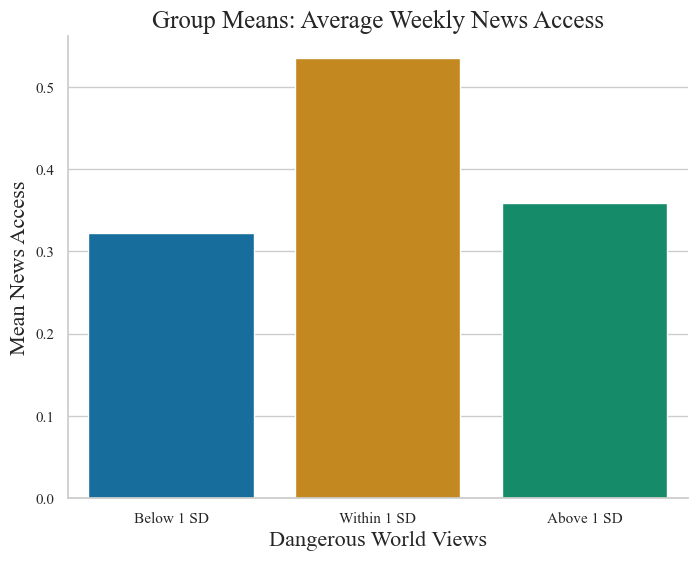

In [242]:
# plot group differences 
sns.set(style="whitegrid", font="Times New Roman")
plt.figure(figsize = (8, 6))
sns.barplot(x = 'dangerous_world_c', y = 'group_mean_weekly_news_access', data = dws_desc,
                order = ["Below 1 SD", "Within 1 SD", "Above 1 SD"], palette="colorblind")
plt.title('Group Means: Average Weekly News Access', fontsize=18)
plt.xlabel('Dangerous World Views', fontsize = 16)
plt.ylabel('Mean News Access', fontsize = 16)
sns.despine()

# Show the plot
plt.show()

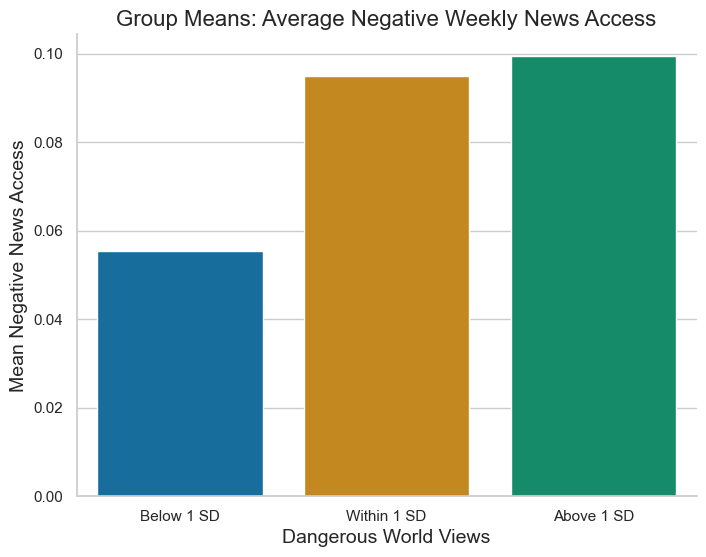

In [40]:
# plot group differences 
sns.set(style="whitegrid")
plt.figure(figsize = (8, 6))
sns.barplot(x = 'dangerous_world_c', y = 'group_mean_weekly_neg_access', data = dws_desc,
                order = ["Below 1 SD", "Within 1 SD", "Above 1 SD"], palette="colorblind")
plt.title('Group Means: Average Negative Weekly News Access', fontsize=16)
plt.xlabel('Dangerous World Views', fontsize = 14)
plt.ylabel('Mean Negative News Access', fontsize = 14)
sns.despine()

# Show the plot
plt.show()

In [41]:
# side-by-side: 
dws_desc_long = dws_desc[["dangerous_world_c", "group_mean_weekly_news_access", "group_mean_weekly_neg_access"]]
dws_desc_long = dws_desc_long.melt(
    id_vars = "dangerous_world_c",
    value_vars = ["group_mean_weekly_news_access", "group_mean_weekly_neg_access"],
    var_name = "news_type", 
    value_name = "mean_access", 
    )

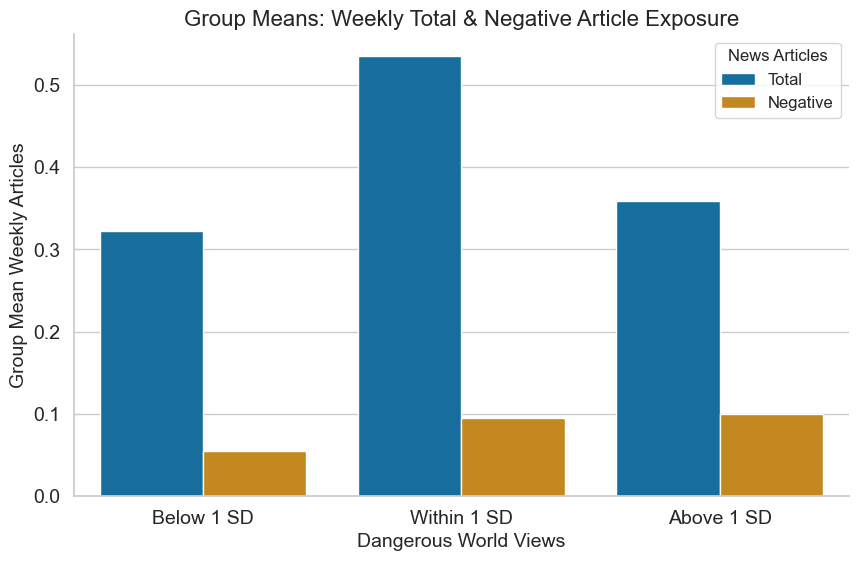

In [42]:
dws_desc_long

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
barplot=sns.barplot(x = "dangerous_world_c", y = "mean_access", hue = "news_type", data = dws_desc_long, 
           palette = "colorblind", order=["Below 1 SD", "Within 1 SD", "Above 1 SD"])
plt.title ("Group Means: Weekly Total & Negative Article Exposure", fontsize=16)
plt.xlabel ("Dangerous World Views", fontsize=14)
plt.ylabel ("Group Mean Weekly Articles", fontsize=14)
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)

#modify legend
handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Total', 'Negative'], title='News Articles', fontsize=12)
sns.despine()
plt.show()

### Note: 
- The group average takes into account weeks where people did *not* access any news. 
- Problem in terms of negativity rate: 0 here represents both what people did not access any news at all AND where they accessed news, but no negative articles.
- I think this mostly makes sense to compare overall news access but not really (or not specifically enough) negativity.

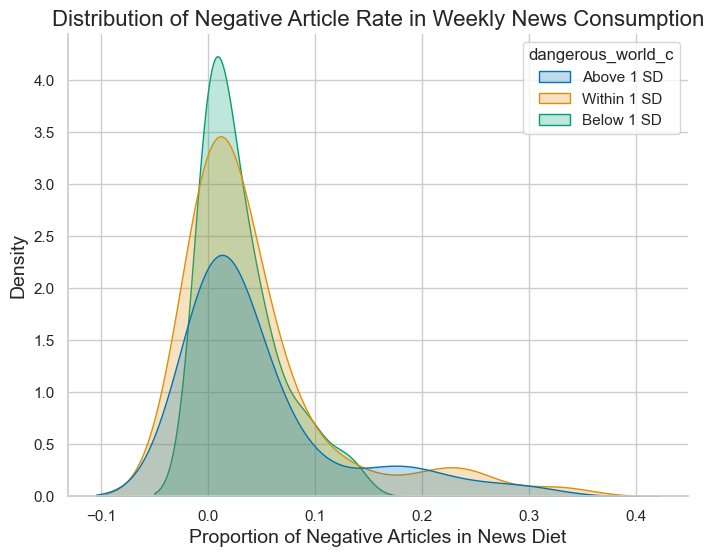

In [43]:
# Examine grouped distribution: Negativity rate
sns.set_style("whitegrid")
plt.figure(figsize = (8, 6))
sns.kdeplot (x = "mean_weekly_neg_rate", hue = "dangerous_world_c", data = id_week_news_use, 
            hue_order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"],fill=True, 
            palette = "colorblind")
sns.despine()
plt.title("Distribution of Negative Article Rate in Weekly News Consumption", fontsize=16)
plt.xlabel("Proportion of Negative Articles in News Diet", fontsize = 14)
plt.ylabel ("Density", fontsize = 14)
plt.show()

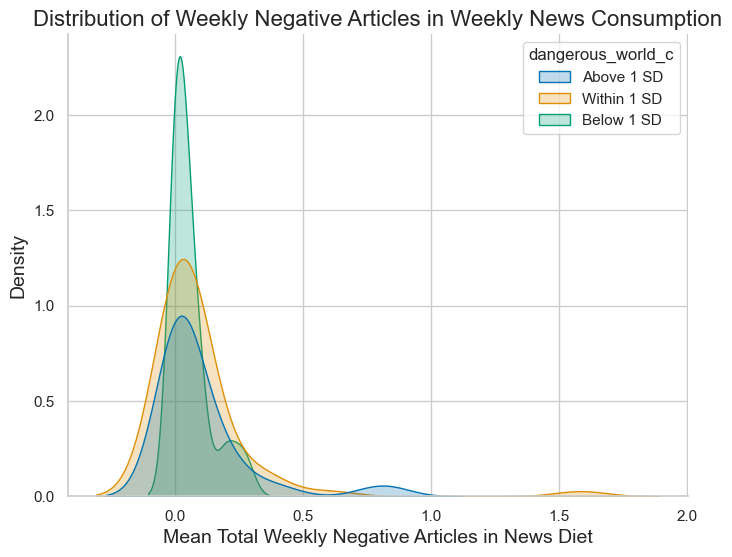

In [44]:
# Examine group distibution: Absokute access to negative news (not rate) 

sns.set_style("whitegrid")
plt.figure(figsize = (8, 6))
sns.kdeplot (x = "mean_weekly_neg_access", hue = "dangerous_world_c", data = id_week_news_use, 
            hue_order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"],fill=True, 
            palette = "colorblind")
sns.despine()
plt.title("Distribution of Weekly Negative Articles in Weekly News Consumption", fontsize=16)
plt.xlabel("Mean Total Weekly Negative Articles in News Diet", fontsize = 14)
plt.ylabel ("Density", fontsize = 14)
plt.show()

- Again, not sure if this makes sense due to the dual meaning of 0

## >3.3.3. Plot the same thing but only with "true negativity rate"

In [45]:
# get descriptives 
# each row represents a unique participants' descriptives of their weekly consumption across the year.
id_week_accessed = week_neg_news.groupby("submission_id").agg(
    total_weekly_news_mean = ("count_total_week", "mean"),
    total_weekly_news_std = ("count_total_week", "std"),
    total_weekly_neg_news_mean = ("count_neg_week", "mean"), 
    total_weekly_neg_news_std = ("count_neg_week", "std"),
    neg_rate_week_mean = ("neg_rate_week", "mean"), 
    neg_rate_week_std = ("neg_rate_week", "std")).reset_index()

In [46]:
# overall dataset 
overall_week_accessed_descriptives = id_week_accessed.agg(
    all_weekly_news_mean = ("total_weekly_news_mean", "mean"),
    all_weekly_news_std = ("total_weekly_news_mean", "std"),
    all_weekly_neg_news_mean = ("total_weekly_neg_news_mean", "mean"), 
    all_weekly_neg_news_std = ("total_weekly_neg_news_mean", "std"),
    all_rate_week_mean = ("neg_rate_week_mean", "mean"), 
    all_rate_week_std = ("neg_rate_week_mean", "std")).reset_index()
overall_week_accessed_descriptives

,index,total_weekly_news_mean,total_weekly_neg_news_mean,neg_rate_week_mean
0,all_weekly_news_mean,2.439521,NaN,NaN
1,all_weekly_news_std,2.040896,NaN,NaN
2,all_weekly_neg_news_mean,NaN,0.399971,NaN
3,all_weekly_neg_news_std,NaN,0.412697,NaN
4,all_rate_week_mean,NaN,NaN,0.252264
5,all_rate_week_std,NaN,NaN,0.280839


In [47]:
# group level: join with dws
id_week_accessed = pd.merge(id_week_accessed, dws, on = "submission_id", how = "left")

In [48]:
# get mean and sd
dws_desc_accessed = id_week_accessed.groupby("dangerous_world_c").agg(
    group_mean_weekly_news_access = ("total_weekly_news_mean", "mean"),
    group_sd_weekly_news_access = ("total_weekly_news_mean", "std"), 
    group_mean_weekly_neg_access = ("total_weekly_neg_news_mean", "mean"), 
    group_sd_weekly_neg_access = ("total_weekly_neg_news_mean", "std"), 
    group_mean_weekly_neg_rate = ("neg_rate_week_mean", "mean"), 
    group_sd_weekly_neg_rate = ("neg_rate_week_mean", "std")).reset_index()
dws_desc_accessed

,dangerous_world_c,group_mean_weekly_news_access,group_sd_weekly_news_access,group_mean_weekly_neg_access,group_sd_weekly_neg_access,group_mean_weekly_neg_rate,group_sd_weekly_neg_rate
0,Above 1 SD,2.116019,1.569433,0.378745,0.391230,0.238990,0.260691
1,Below 1 SD,2.320462,1.763374,0.451012,0.432344,0.299951,0.321228
2,Within 1 SD,2.768296,2.485945,0.374048,0.415010,0.223328,0.259021


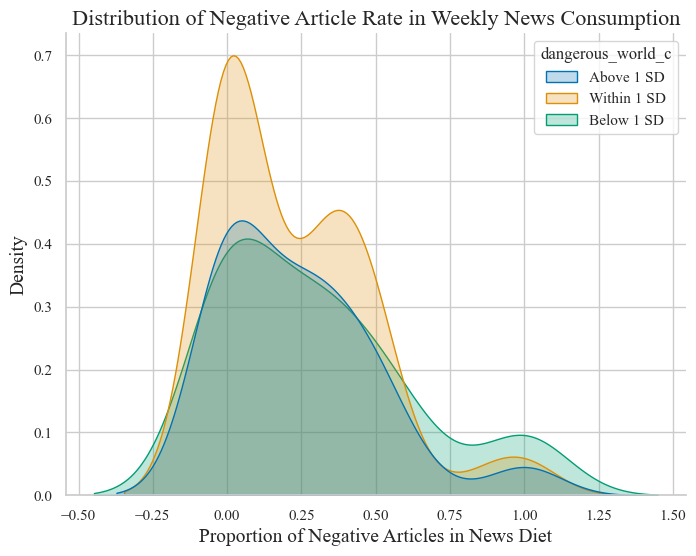

In [244]:
sns.set_style("whitegrid", {'font.family': 'Times New Roman'})
plt.figure(figsize = (8, 6))
sns.kdeplot (x = "neg_rate_week_mean", hue = "dangerous_world_c", data = id_week_accessed, 
            hue_order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"],fill=True, 
            palette = "colorblind")
sns.despine()
plt.title("Distribution of Negative Article Rate in Weekly News Consumption", fontsize=16)
plt.xlabel("Proportion of Negative Articles in News Diet", fontsize = 14)
plt.ylabel ("Density", fontsize = 14)
plt.show()

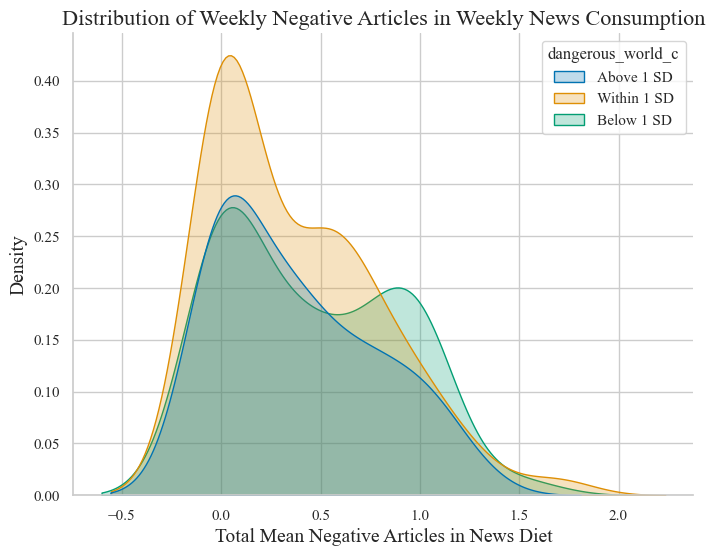

In [246]:
sns.set_style("whitegrid",  {'font.family': 'Times New Roman'})
plt.figure(figsize = (8, 6))
sns.kdeplot (x = "total_weekly_neg_news_mean", hue = "dangerous_world_c", data = id_week_accessed, 
            hue_order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"],fill=True, 
            palette = "colorblind")
sns.despine()
plt.title("Distribution of Weekly Negative Articles in Weekly News Consumption", fontsize=16)
plt.xlabel("Total Mean Negative Articles in News Diet", fontsize = 14)
plt.ylabel ("Density", fontsize = 14)
plt.show()

In [51]:
dws_desc_long_accessed = dws_desc_accessed[["dangerous_world_c", "group_mean_weekly_news_access", "group_mean_weekly_neg_access"]]
dws_desc_long_accessed = dws_desc_long_accessed.melt(
    id_vars = "dangerous_world_c",
    value_vars = ["group_mean_weekly_news_access", "group_mean_weekly_neg_access"],
    var_name = "news_type", 
    value_name = "mean_access", 
    )

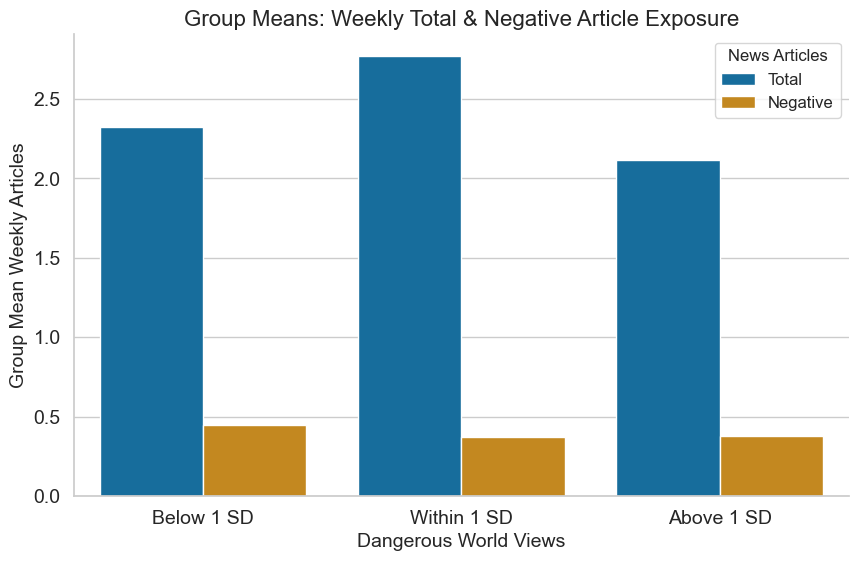

In [52]:
dws_desc_long

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
barplot=sns.barplot(x = "dangerous_world_c", y = "mean_access", hue = "news_type", data = dws_desc_long_accessed, 
           palette = "colorblind", order=["Below 1 SD", "Within 1 SD", "Above 1 SD"])
plt.title ("Group Means: Weekly Total & Negative Article Exposure", fontsize=16)
plt.xlabel ("Dangerous World Views", fontsize=14)
plt.ylabel ("Group Mean Weekly Articles", fontsize=14)
plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)

#modify legend
handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Total', 'Negative'], title='News Articles', fontsize=12)
sns.despine()
plt.show()

## > 3.4. Monthly News Exposure

In [54]:
# ensure it's datetime format 
events_survey["date_accessed"] = pd.to_datetime(events_survey["date_accessed"])
events_survey["month"] = events_survey["date_accessed"].dt.strftime("%Y-%m")

In [57]:
# Filter out rows where date_col matches '2021-08' or '2022-08' as we don't have a full month here, which may skew our data
events_survey = events_survey[~events_survey["month"].isin(["2021-08", "2022-08"])]
events_survey

,Unnamed: 0,submission_id,dangerous_world,people_take_advantage,careful_with_people,Q13_trust_general_1,dws_all,dangerous_world_c,dangerous_world_q,social_distrust,...,n_deleted,depth,clustNum,docs,date_accessed,Negativity_Label,Event_Topic,cluster_date_range,week_number,month
1,32,js120,2.0,3.0,6.0,7.0,3.0,Below 1 SD,q1,3.333333,...,0,3.0,71,Baudet moet tweets met Holocaustvergelijking v...,2021-12-23,0.0,Other,7 days,18,2021-12
2,70,js120,2.0,3.0,6.0,7.0,3.0,Below 1 SD,q1,3.333333,...,0,3.0,3,Fotofinish beslist Amstel Gold Race: Kwiatkows...,2022-04-10,0.0,Sports,1 days,34,2022-04
3,71,js120,2.0,3.0,6.0,7.0,3.0,Below 1 SD,q1,3.333333,...,0,3.0,3,Fotofinish beslist Amstel Gold Race: Kwiatkows...,2022-04-10,0.0,Sports,1 days,34,2022-04
4,72,js120,2.0,3.0,6.0,7.0,3.0,Below 1 SD,q1,3.333333,...,0,2.0,4,Wielrennen: Amstel Gold Race voor mannen Tip d...,2022-04-10,0.0,0,0 days,34,2022-04
5,82,js120,2.0,3.0,6.0,7.0,3.0,Below 1 SD,q1,3.333333,...,0,2.0,178,Johnny Depp trekt aan langste eind in smaadzaa...,2022-06-01,0.0,Johnny Depp Wins Lawsuit Against Amber Heard,6 days,41,2022-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,63816,zl31337,4.0,2.0,2.0,6.0,2.5,Within 1 SD,q3,2.000000,...,0,4.0,294,"Er stroomt weer gas door Nord Stream 1, prijze...",2022-07-22,0.0,Nordstream Pipeline “maintenance” by Russia,7 days,48,2022-07
3170,63871,zl31337,4.0,2.0,2.0,6.0,2.5,Within 1 SD,q3,2.000000,...,0,2.0,293,"Personeel Lufthansa gaat staken, 134.000 reizi...",2022-07-26,0.0,NaN,1 days,49,2022-07
3171,63876,zl31337,4.0,2.0,2.0,6.0,2.5,Within 1 SD,q3,2.000000,...,0,2.0,695,Commissieleden en bestuurslid Amsterdams corps...,2022-07-26,1.0,Amsterdam Student Corps Sexism Scandal,0 days,49,2022-07
3172,63946,zl31337,4.0,2.0,2.0,6.0,2.5,Within 1 SD,q3,2.000000,...,0,2.0,688,Tumor Dortmund-spits Haller blijkt kwaadaardig...,2022-07-30,1.0,Dortmund player has malignant tumor,0 days,50,2022-07


In [58]:
# group by month and submission id, summarise absolute number of negative articles read & overall articles read, 
# calculate negativity rate. 
month_neg_news = events_survey.groupby(["month", "submission_id"]).agg(
    count_neg_month = ("Negativity_Label", lambda x: (x==1).sum()), 
    count_total_month = ("Negativity_Label", "size")).reset_index()
month_neg_news["neg_rate_month"] = month_neg_news["count_neg_month"]/month_neg_news["count_total_month"]

In [60]:
month_neg_news.head(2)

,month,submission_id,count_neg_month,count_total_month,neg_rate_month
0,2021-09,as191426,2,4,0.5
1,2021-09,as2005,1,1,1.0


In [61]:
# get monthly mean for each person such that each submission ID has one descriptive that describes their monthly consumption
id_month_neg_news = month_neg_news.groupby(["submission_id"]).agg(
    mean_monthly_neg_id = ("count_neg_month", "mean"),
    mean_neg_rate_month_id = ("neg_rate_month", "mean"), 
    mean_total_month_id = ("count_total_month", "mean")).reset_index()

In [62]:
id_month_neg_news = pd.merge(id_month_neg_news, dws, how = "left", on = "submission_id")

In [63]:
# get overall monthly negativity descriptives (e.g., mean of each person's mean)
id_month_neg_news.agg(
    mean_monthly_negative_articles = ("mean_monthly_neg_id", "mean"), 
    std_monthly_negative_articles = ("mean_monthly_neg_id", "std"), 
    mean_monthly_neg_rate = ("mean_neg_rate_month_id", "mean"),
    std_monthly_neg_rate = ("mean_neg_rate_month_id", "std"), 
    mean_monthly_art_access = ("mean_total_month_id", "mean"), 
    std_monthly_art_access = ("mean_total_month_id", "std"))

,mean_monthly_neg_id,mean_neg_rate_month_id,mean_total_month_id
mean_monthly_negative_articles,0.707321,NaN,NaN
std_monthly_negative_articles,0.920764,NaN,NaN
mean_monthly_neg_rate,NaN,0.253493,NaN
std_monthly_neg_rate,NaN,0.291354,NaN
mean_monthly_art_access,NaN,NaN,3.887586
std_monthly_art_access,NaN,NaN,4.437366


In [64]:
# get grouped descriptives by level of dangerous world views
dws_month_descriptives = id_month_neg_news.groupby("dangerous_world_c").agg(
    mean_monthly_negative_articles = ("mean_monthly_neg_id", "mean"), 
    std_monthly_negative_articles = ("mean_monthly_neg_id", "std"), 
    mean_monthly_neg_rate = ("mean_neg_rate_month_id", "mean"),
    std_monthly_neg_rate = ("mean_neg_rate_month_id", "std"), 
    mean_monthly_art_access = ("mean_total_month_id", "mean"), 
    std_monthly_art_access = ("mean_total_month_id", "std")).reset_index()

dws_month_descriptives

,dangerous_world_c,mean_monthly_negative_articles,std_monthly_negative_articles,mean_monthly_neg_rate,std_monthly_neg_rate,mean_monthly_art_access,std_monthly_art_access
0,Above 1 SD,0.748948,0.966936,0.240617,0.287872,3.082271,2.723995
1,Below 1 SD,0.614572,0.561617,0.296597,0.318627,3.262585,2.462534
2,Within 1 SD,0.750463,1.105907,0.228823,0.272343,4.953882,6.149648


In [202]:
# Visualise including standard deviations
dws_monthly_sd = id_month_neg_news.drop(columns=["mean_total_month_id"]).melt(
    id_vars = "dangerous_world_c", 
    value_vars = ["mean_monthly_neg_id", "mean_neg_rate_month_id"], 
    var_name = "descriptive_types", 
    value_name = "means").reset_index()

In [203]:
dws_monthly_sd

,index,dangerous_world_c,descriptive_types,means
0,0,Above 1 SD,mean_monthly_neg_id,0.000
1,1,Within 1 SD,mean_monthly_neg_id,1.500
2,2,Above 1 SD,mean_monthly_neg_id,0.500
3,3,Below 1 SD,mean_monthly_neg_id,0.000
4,4,Above 1 SD,mean_monthly_neg_id,0.250
...,...,...,...,...
275,275,Above 1 SD,mean_neg_rate_month_id,0.000
276,276,Below 1 SD,mean_neg_rate_month_id,0.000
277,277,Above 1 SD,mean_neg_rate_month_id,0.000
278,278,Above 1 SD,mean_neg_rate_month_id,0.000


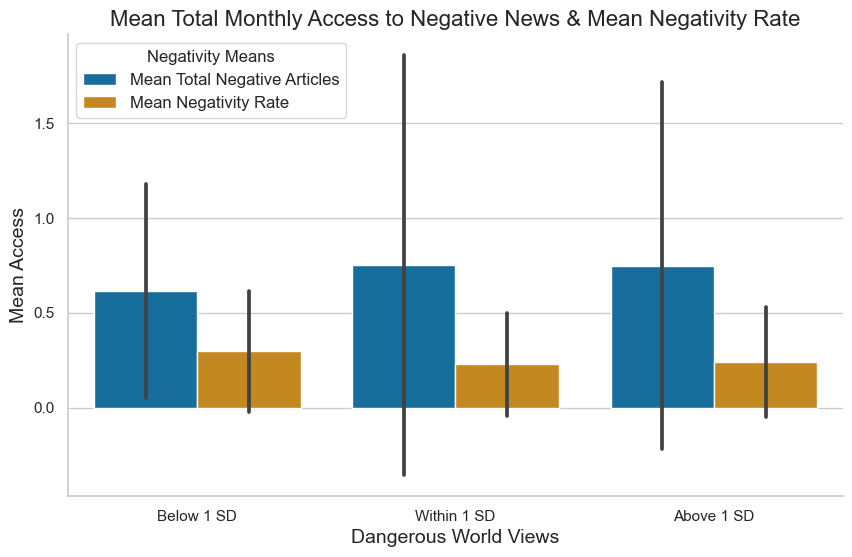

In [204]:
# grouped monthly access barchart 
# this does not really make sense though-- total neg. articles is on a different scale to negativity rate so that's hard to compare! 
# It makes more sense to show total negativity alongside total articles, and then show seperately the 
# negativity rate.
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x = "dangerous_world_c", y = "means", hue = "descriptive_types", data = dws_monthly_sd,
                      estimator = "mean", errorbar = "sd", 
                      order = ["Below 1 SD", "Within 1 SD", "Above 1 SD"],
                      palette = "colorblind")
plt.title("Mean Total Monthly Access to Negative News & Mean Negativity Rate", fontsize=16)
plt.xlabel ("Dangerous World Views", fontsize=14)
plt.ylabel ("Mean Access", fontsize = 14)
handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Mean Total Negative Articles', 'Mean Negativity Rate'], title='Negativity Means', fontsize=12)
sns.despine()



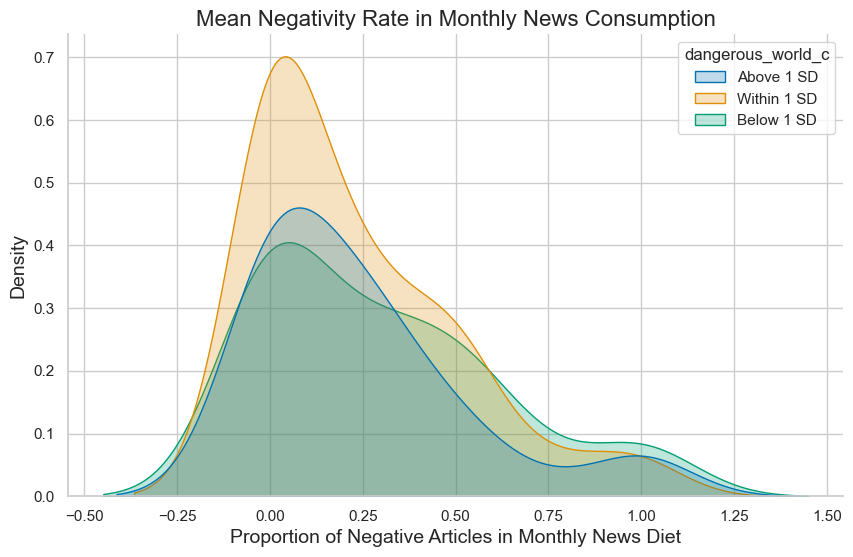

In [280]:
# Grouped distibution of negativity rate in monthly news consumption
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
kde=sns.kdeplot(x = "mean_neg_rate_month_id", hue = "dangerous_world_c", data = id_month_neg_news, 
           hue_order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"],fill=True, 
            palette = "colorblind")
sns.despine()
plt.title("Mean Negativity Rate in Monthly News Consumption", fontsize=16)
plt.xlabel("Proportion of Negative Articles in Monthly News Diet", fontsize = 14)
plt.ylabel ("Density", fontsize = 14)
plt.show()

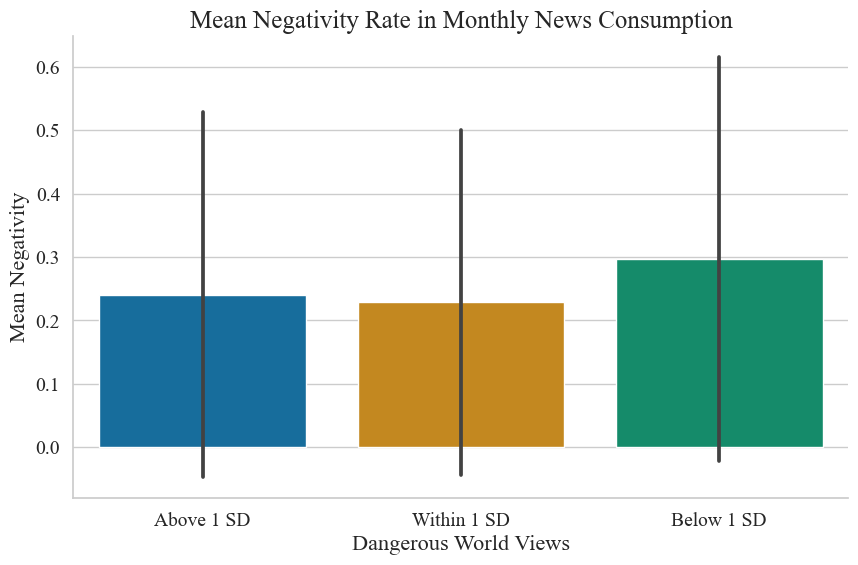

In [281]:
# plot grouped means & sd 
sns.set_style("whitegrid",  {'font.family': 'Times New Roman'})
plt.figure(figsize=(10, 6))
sns.barplot (x = "dangerous_world_c", y = "mean_neg_rate_month_id", data = id_month_neg_news, 
             estimator = "mean", errorbar = "sd",
             order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"], palette="colorblind")
plt.title ("Mean Negativity Rate in Monthly News Consumption", fontsize=18)
plt.xlabel("Dangerous World Views", fontsize = 16)
plt.ylabel("Mean Negativity", fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=14)

sns.despine()

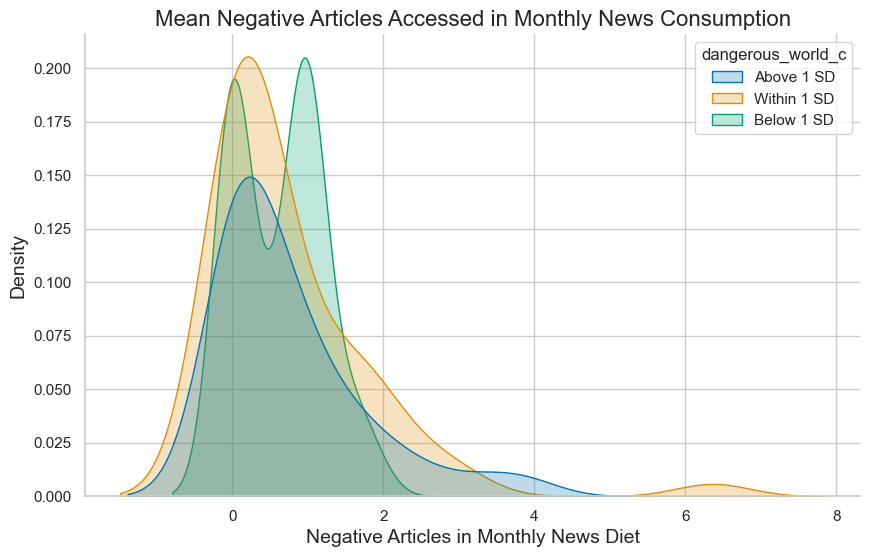

In [282]:
# grouped descriptives 
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
kde=sns.kdeplot(x = "mean_monthly_neg_id", hue = "dangerous_world_c", data = id_month_neg_news, 
           hue_order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"],fill=True, 
            palette = "colorblind")
sns.despine()
plt.title("Mean Negative Articles Accessed in Monthly News Consumption", fontsize=16)
plt.xlabel("Negative Articles in Monthly News Diet", fontsize = 14)
plt.ylabel ("Density", fontsize = 14)
plt.show()

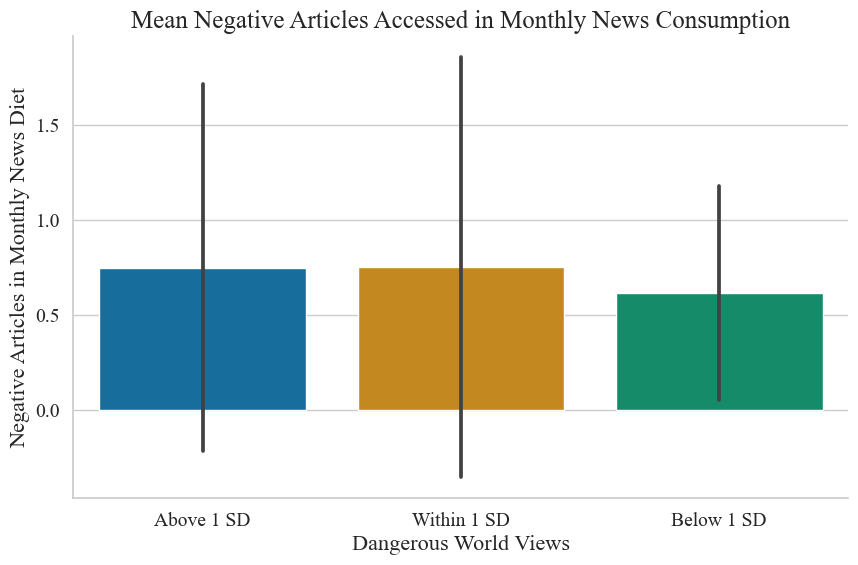

In [283]:
# plot grouped means & sd 
sns.set_style("whitegrid",  {'font.family': 'Times New Roman'})
plt.figure(figsize=(10, 6))
sns.barplot (x = "dangerous_world_c", y = "mean_monthly_neg_id", data = id_month_neg_news, 
             estimator = "mean", errorbar = "sd",
             order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"], palette="colorblind")
plt.title ("Mean Negative Articles Accessed in Monthly News Consumption", fontsize=18)
plt.xlabel("Dangerous World Views", fontsize = 16)
plt.ylabel("Negative Articles in Monthly News Diet", fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=14)

sns.despine()

## >3.5 Entire Timeframe Negativity descriptives

In [260]:
# get mean and mode of overall article negativity for each participant
total_negativity = events_survey.groupby(["submission_id"]).agg(
    mean_individual_negativity = ("Negativity_Label", "mean"), 
    abs_individual_negativity = ("Negativity_Label", "sum")).reset_index()

# merge with survey clusters to get individuals overall negativity 
#events_survey = pd.merge(events_survey, total_negativity, how = "left", on = "submission_id")

In [261]:
# merge with dws to get grouped data
total_negativity = pd.merge(total_negativity, dws, how = "left", on = "submission_id")

In [262]:
total_negativity

,submission_id,mean_individual_negativity,abs_individual_negativity,dangerous_world_c
0,ak001,0.000000,0.0,Above 1 SD
1,as191243,0.750000,3.0,Within 1 SD
2,as191426,0.285714,2.0,Above 1 SD
3,as192017,0.000000,0.0,Below 1 SD
4,as2004,0.250000,1.0,Above 1 SD
...,...,...,...,...
135,zl31702,0.000000,0.0,Above 1 SD
136,zl31712,0.000000,0.0,Below 1 SD
137,zl31721,0.000000,0.0,Above 1 SD
138,zl31732,0.000000,0.0,Above 1 SD


In [264]:
# descriptives table: 

# aggregate negativity by group
alltime_negativity_desc = total_negativity.groupby(["dangerous_world_c"]).agg(
    
    # aggregations using individual mean of negativity
    mean_group_negativity_m = ("mean_individual_negativity", "mean"), 
    max_group_negativity_m = ("mean_individual_negativity", "max"), 
    min_group_negativity_m = ("mean_individual_negativity", "min"), 
    std_negativity_m = ("mean_individual_negativity", "std"), 
    
    #aggregations using individual sum of negativity
    mean_group_negativity_abs = ("abs_individual_negativity", "mean"), 
    max_group_negativity_abs = ("abs_individual_negativity", "max"), 
    min_group_negativity_abs = ("abs_individual_negativity", "min"), 
    std_negativity_abs = ("abs_individual_negativity", "std")).reset_index()

alltime_negativity_desc

,dangerous_world_c,mean_group_negativity_m,max_group_negativity_m,min_group_negativity_m,std_negativity_m,mean_group_negativity_abs,max_group_negativity_abs,min_group_negativity_abs,std_negativity_abs
0,Above 1 SD,0.250708,1.0,0.0,0.288596,5.025000,43.0,0.0,9.525909
1,Below 1 SD,0.275874,1.0,0.0,0.318128,2.863636,15.0,0.0,3.885518
2,Within 1 SD,0.209766,1.0,0.0,0.265196,4.535714,70.0,0.0,10.688931


In [265]:
# select columns for visualisation 
dws_alltime_negativity_rate = total_negativity.drop(columns="abs_individual_negativity")

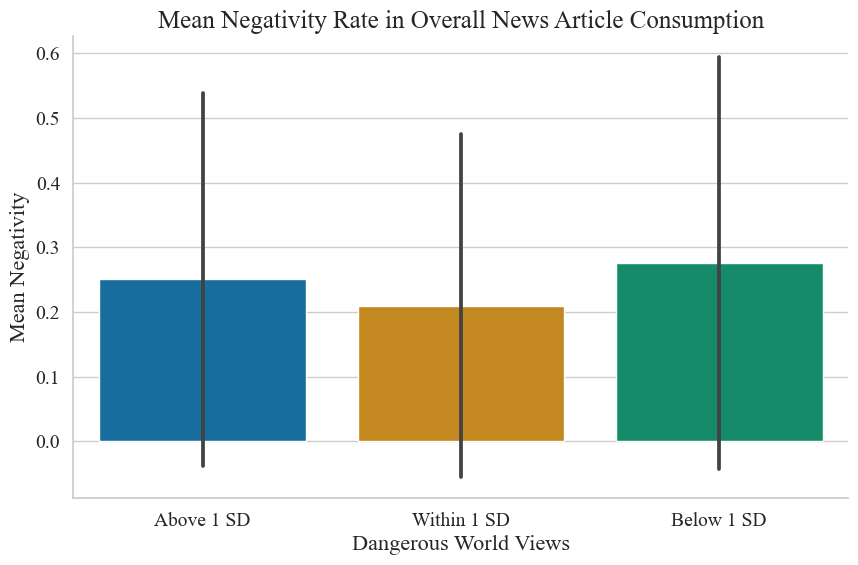

In [267]:
# plot grouped means & sd 
sns.set_style("whitegrid",  {'font.family': 'Times New Roman'})
plt.figure(figsize=(10, 6))
sns.barplot (x = "dangerous_world_c", y = "mean_individual_negativity", data = dws_alltime_negativity_rate, 
             estimator = "mean", errorbar = "sd",
             order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"], palette="colorblind")
plt.title ("Mean Negativity Rate in Overall News Article Consumption", fontsize=18)
plt.xlabel("Dangerous World Views", fontsize = 16)
plt.ylabel("Mean Negativity", fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=14)

sns.despine()

# negativity goes from 0 -1

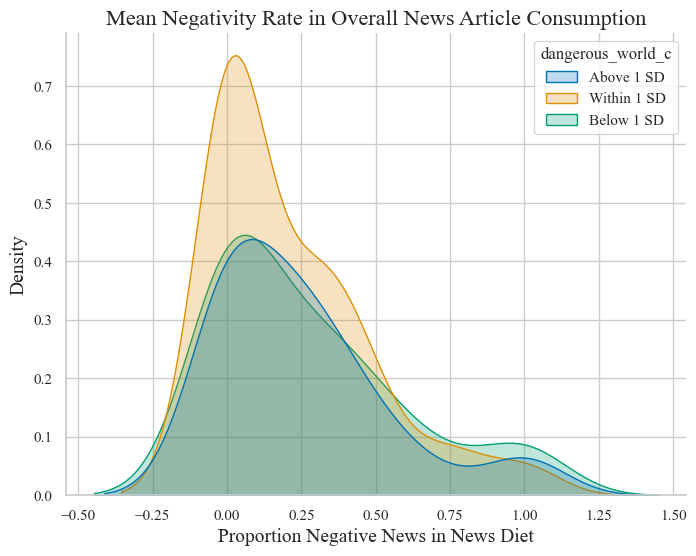

In [279]:
sns.set_style("whitegrid",  {'font.family': 'Times New Roman'})
plt.figure(figsize = (8, 6))
sns.kdeplot (x = "mean_individual_negativity", hue = "dangerous_world_c", data = dws_alltime_negativity_rate, 
            hue_order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"],fill=True, 
            palette = "colorblind")
sns.despine()
plt.title("Mean Negativity Rate in Overall News Article Consumption", fontsize=16)
plt.xlabel("Proportion Negative News in News Diet", fontsize = 14)
plt.ylabel ("Density", fontsize = 14)
plt.show()

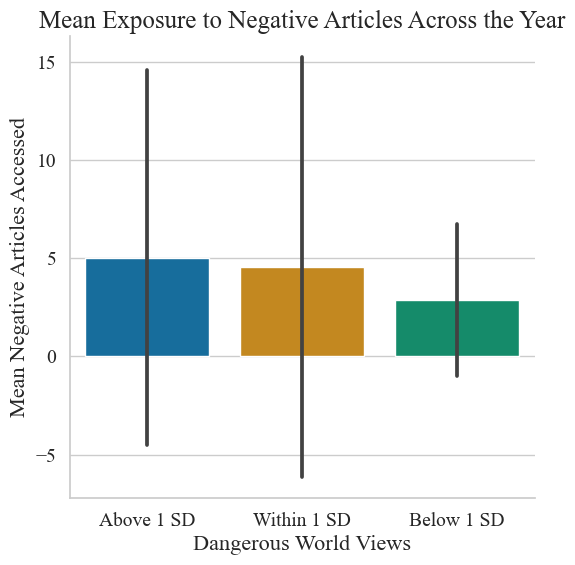

In [321]:
# plot the absolute 
# select columns for visualisation 
dws_alltime_negativity_abs = total_negativity.drop(columns="mean_individual_negativity")

# plot grouped means & sd 
sns.set_style("whitegrid",  {'font.family': 'Times New Roman'})
plt.figure(figsize=(6,6))
sns.barplot (x = "dangerous_world_c", y = "abs_individual_negativity", data = dws_alltime_negativity_abs, 
             estimator = "mean", errorbar = "sd",
             order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"], palette="colorblind")
plt.title ("Mean Exposure to Negative Articles Across the Year", fontsize=18)
plt.xlabel("Dangerous World Views", fontsize = 16)
plt.ylabel("Mean Negative Articles Accessed", fontsize = 16)
plt.tick_params(axis='both', which='major', labelsize=14)

sns.despine()


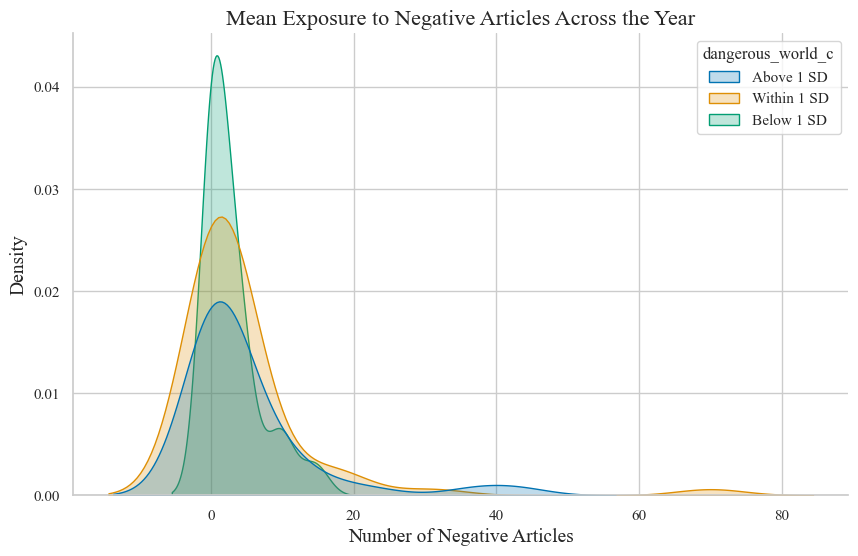

In [323]:
sns.set_style("whitegrid",  {'font.family': 'Times New Roman'})
plt.figure(figsize = (10, 6))
sns.kdeplot (x = "abs_individual_negativity", hue = "dangerous_world_c", data = dws_alltime_negativity_abs, 
            hue_order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"],fill=True, 
            palette = "colorblind")
sns.despine()
plt.title("Mean Exposure to Negative Articles Across the Year", fontsize=16)
plt.xlabel("Number of Negative Articles", fontsize = 14)
plt.ylabel ("Density", fontsize = 14)
plt.show()

In [272]:
# formally: differences in means test between the three groups 
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [274]:
dws_alltime_negativity_abs

,submission_id,abs_individual_negativity,dangerous_world_c
0,ak001,0.0,Above 1 SD
1,as191243,3.0,Within 1 SD
2,as191426,2.0,Above 1 SD
3,as192017,0.0,Below 1 SD
4,as2004,1.0,Above 1 SD
...,...,...,...
135,zl31702,0.0,Above 1 SD
136,zl31712,0.0,Below 1 SD
137,zl31721,0.0,Above 1 SD
138,zl31732,0.0,Above 1 SD


In [275]:
#select only required columns (here: each row represents one submission id's mean negativity level)
diff_means_abs = dws_alltime_negativity_abs[["dangerous_world_c", "abs_individual_negativity"]]

# Fit the model
model_abs = ols('abs_individual_negativity ~ C(dangerous_world_c)', data=dws_alltime_negativity_abs).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model_abs, typ=2)

print(anova_table)

                           sum_sq     df         F   PR(>F)
C(dangerous_world_c)    111.76461    2.0  0.731075  0.48326
Residual              10472.08539  137.0       NaN      NaN


In [277]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
posthoc_tukey_abs = pairwise_tukeyhsd(diff_means_abs['abs_individual_negativity'], diff_means_abs['dangerous_world_c'])
print(posthoc_tukey_abs)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2   meandiff p-adj   lower  upper  reject
------------------------------------------------------------
Above 1 SD  Below 1 SD  -2.1614 0.4963 -6.6871 2.3644  False
Above 1 SD Within 1 SD  -0.4893 0.9605 -4.7779 3.7993  False
Below 1 SD Within 1 SD   1.6721 0.6101 -2.5013 5.8454  False
------------------------------------------------------------


In [217]:
# formally: differences in means test between the three groups 
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [278]:
#select only required columns (here: each row represents one submission id's mean negativity level)
diff_means_m = total_negativity[["dangerous_world_c", "mean_individual_negativity"]]

# Fit the model
model_m = ols('mean_individual_negativity ~ C(dangerous_world_c)', data=diff_means_m).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model_m, typ=2)

print(anova_table)

                         sum_sq     df         F    PR(>F)
C(dangerous_world_c)   0.111699    2.0  0.667184  0.514811
Residual              11.468137  137.0       NaN       NaN


In [219]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
posthoc_tukey = pairwise_tukeyhsd(diff_means['mean_individual_negativity'], diff_means['dangerous_world_c'])
print(posthoc_tukey)

# no statistically significant difference between the groups

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2   meandiff p-adj   lower  upper  reject
------------------------------------------------------------
Above 1 SD  Below 1 SD   0.0252 0.9164 -0.1246 0.1749  False
Above 1 SD Within 1 SD  -0.0409 0.7735 -0.1829  0.101  False
Below 1 SD Within 1 SD  -0.0661 0.4948 -0.2042  0.072  False
------------------------------------------------------------


# Negative Event Consumption

## >> 3.2.2 Proportion of negative news EVENT consumption ("negativity rate"): 
- This looks at the **event negativity rate**– If patterns are quite different, this suggests negativity is driven by bigger negative events that are consumed more. 
    - Should I control here for event size?

In [85]:
events_survey.head(2)

,Unnamed: 0,submission_id,dangerous_world,people_take_advantage,careful_with_people,Q13_trust_general_1,dws_all,dangerous_world_c,dangerous_world_q,social_distrust,...,n_deleted,depth,clustNum,docs,date_accessed,Negativity_Label,Event_Topic,cluster_date_range,week_number,month
1,32,js120,2.0,3.0,6.0,7.0,3.0,Below 1 SD,q1,3.333333,...,0,3.0,71,Baudet moet tweets met Holocaustvergelijking v...,2021-12-23,0.0,Other,7 days,18,2021-12
2,70,js120,2.0,3.0,6.0,7.0,3.0,Below 1 SD,q1,3.333333,...,0,3.0,3,Fotofinish beslist Amstel Gold Race: Kwiatkows...,2022-04-10,0.0,Sports,1 days,34,2022-04


In [381]:
# for entire timeframe: total event exposure & negativity
event_rate = events_survey.groupby("submission_id").agg(
    total_event_count = ("clustNum", "nunique"),
    neg_event_count=("clustNum", lambda x: x[events_survey.loc[x.index, 'Negativity_Label'] == 1].nunique()),
    neut_event_count=("clustNum", lambda x: x[events_survey.loc[x.index, 'Negativity_Label'] == 0].nunique())).reset_index()
event_rate["neg_event_rate"] = event_rate["neg_event_count"]/event_rate["total_event_count"]
event_rate

,submission_id,total_event_count,neg_event_count,neut_event_count,neg_event_rate
0,ak001,3,0,3,0.000000
1,as191243,3,2,1,0.666667
2,as191426,7,2,5,0.285714
3,as192017,9,0,9,0.000000
4,as2004,4,1,3,0.250000
...,...,...,...,...,...
135,zl31702,5,0,5,0.000000
136,zl31712,1,0,1,0.000000
137,zl31721,1,0,1,0.000000
138,zl31732,2,0,2,0.000000


In [382]:
# join with dws
event_rate = pd.merge(event_rate, dws, how = "left", on = "submission_id")

In [383]:
dangerous_world_num = events_survey[["submission_id", "dangerous_world"]]

In [384]:
# join to event rate 
event_rate = pd.merge(event_rate, dangerous_world_num, how = "left", on = "submission_id")

In [385]:
event_rate = event_rate.drop_duplicates(subset="submission_id")

In [386]:
# this gives me: total events every person was exposed to. (1 row per person incl. their descriptives.)
# This I can group
event_rate.head(2)

,submission_id,total_event_count,neg_event_count,neut_event_count,neg_event_rate,dangerous_world_c,dangerous_world
0,ak001,3,0,3,0.000000,Above 1 SD,6.0
7,as191243,3,2,1,0.666667,Within 1 SD,4.0


## >>> 3.2.2.1 Descriptives

In [387]:
# entire timeframe
event_rate.agg(
    mean_event_exposure_id = ("total_event_count", "mean"),
    std_event_exposure_id = ("total_event_count", "std"),
    mean_neg_event_exposure_id = ("neg_event_count", "mean"),
    std_neg_event_exposure_id = ("neg_event_count", "std"),
    mean_neg_event_rate = ("neg_event_rate", "mean"), 
    std_neg_event_rate = ("neg_event_rate", "std"))

,total_event_count,neg_event_count,neg_event_rate
mean_event_exposure_id,11.271429,NaN,NaN
std_event_exposure_id,21.029559,NaN,NaN
mean_neg_event_exposure_id,NaN,3.250000,NaN
std_neg_event_exposure_id,NaN,6.862603,NaN
mean_neg_event_rate,NaN,NaN,0.261692
std_neg_event_rate,NaN,NaN,0.287963


In [388]:
alltime_event_desc = event_rate.groupby(["dangerous_world_c"]).agg(
     mean_event_exposure_id = ("total_event_count", "mean"),
    std_event_exposure_id = ("total_event_count", "std"),
    mean_neg_event_exposure_id = ("neg_event_count", "mean"),
    std_neg_event_exposure_id = ("neg_event_count", "std"),
    mean_neg_event_rate = ("neg_event_rate", "mean"), 
    std_neg_event_rate = ("neg_event_rate", "std")).reset_index()
alltime_event_desc

,dangerous_world_c,mean_event_exposure_id,std_event_exposure_id,mean_neg_event_exposure_id,std_neg_event_exposure_id,mean_neg_event_rate,std_neg_event_rate
0,Above 1 SD,12.250000,20.666770,3.900000,7.037628,0.262635,0.286660
1,Below 1 SD,8.227273,11.350369,2.045455,2.551375,0.298199,0.318005
2,Within 1 SD,12.964286,26.515151,3.732143,8.781160,0.232334,0.265125


In [389]:
# visualise in one plot 

#make longer
event_rate_m = event_rate.drop(columns=["neg_event_rate", "total_event_count"]).melt(
    id_vars=["submission_id", "dangerous_world_c", "dangerous_world"], 
    value_vars=["neut_event_count", "neg_event_count"],
    var_name = "event_type", 
    value_name="event_count")

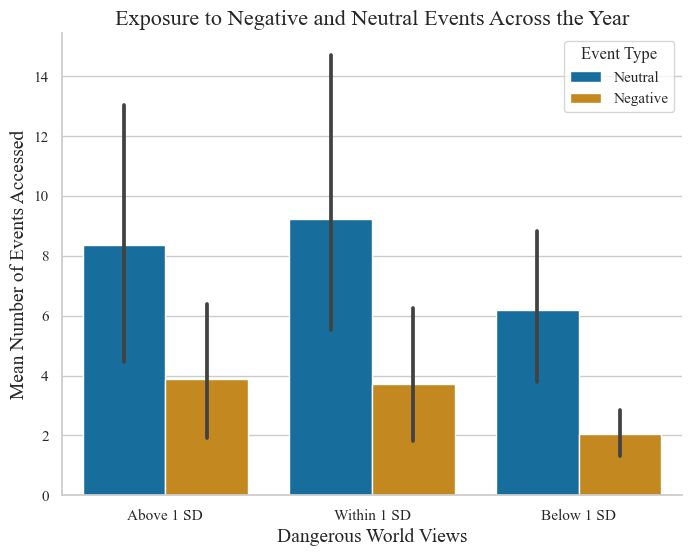

In [391]:
sns.set_style("whitegrid", {"font.family":"Times New Roman"})
plt.figure(figsize=(8,6))
sns.barplot(x = "dangerous_world_c", y = "event_count", hue="event_type", data=event_rate_m,
           order= ["Above 1 SD", "Within 1 SD", "Below 1 SD"], 
           palette = "colorblind")
plt.title ("Exposure to Negative and Neutral Events Across the Year", fontsize=16)
plt.xlabel ("Dangerous World Views", fontsize=14)
plt.ylabel("Mean Number of Events Accessed", fontsize=14)
handles, labels = bar_plot.get_legend_handles_labels()
plt.legend(handles = handles, title="Event Type", labels=["Neutral", "Negative"])
sns.despine()
plt.show()


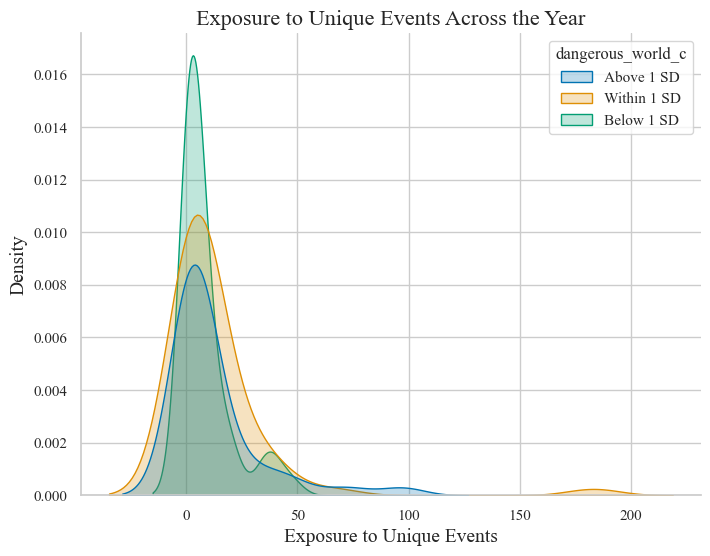

In [348]:
#visualise grouped neg event exposure distributions
plt.figure(figsize = (8, 6))
sns.kdeplot (x = "total_event_count", hue = "dangerous_world_c", data = event_rate, 
            hue_order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"],fill=True, 
            palette = "colorblind")
sns.despine()
plt.title("Exposure to Unique Events Across the Year", fontsize=16)
plt.xlabel("Exposure to Unique Events", fontsize = 14)
plt.ylabel ("Density", fontsize = 14)
plt.show()

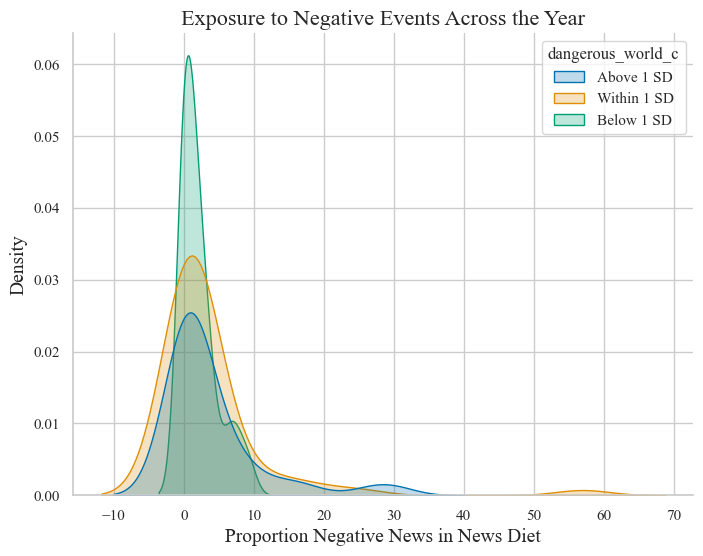

In [420]:
#visualise grouped neg event exposure distributions
sns.set_style("whitegrid", {"font.family":"Times New Roman"})
plt.figure(figsize = (8, 6))
kde_plt=sns.kdeplot (x = "neg_event_count", hue = "dangerous_world_c", data = event_rate, 
            hue_order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"],fill=True, 
            palette = "colorblind")
sns.despine()
plt.title("Exposure to Negative Events Across the Year", fontsize=16)
plt.xlabel("Proportion Negative News in News Diet", fontsize = 14)
plt.ylabel ("Density", fontsize = 14)
plt.show()

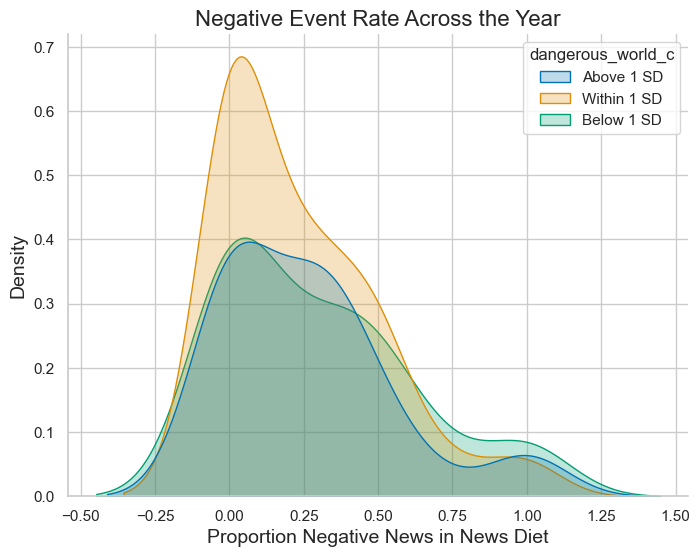

In [95]:
#visualise grouped neg event exposure distributions
plt.figure(figsize = (8, 6))
sns.kdeplot (x = "neg_event_rate", hue = "dangerous_world_c", data = event_rate, 
            hue_order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"],fill=True, 
            palette = "colorblind")
sns.despine()
plt.title("Negative Event Rate Across the Year", fontsize=16)
plt.xlabel("Proportion Negative News in News Diet", fontsize = 14)
plt.ylabel ("Density", fontsize = 14)
plt.show()

In [96]:
# how many events per month on average?
events_survey.groupby(["submission_id", "month"]).agg(
    monthly_unique_event_count = ("clustNum", "nunique")).groupby("month").agg(
    monthly_event_m = ("monthly_unique_event_count", "mean"), 
    monthly_event_sd = ("monthly_unique_event_count", "std")).reset_index()

,month,monthly_event_m,monthly_event_sd
0,2021-09,2.722222,3.122372
1,2021-10,2.125000,1.828373
2,2021-11,2.750000,1.903005
3,2021-12,2.731707,2.549749
4,2022-01,2.946429,3.589984
5,2022-02,3.101695,3.283684
6,2022-03,3.105263,3.801711
7,2022-04,2.849057,3.410370
8,2022-05,2.479167,2.250197
9,2022-06,3.431034,3.190513


In [97]:
# unique exposure to events per month
id_unique_month_events = events_survey.groupby(["submission_id", "month"]).agg(
    monthly_unique_event_count = ("clustNum", "nunique"),
    neg_unique_event_count = ("clustNum", lambda x: x[events_survey.loc[x.index, 'Negativity_Label'] == 1].nunique())).reset_index()
id_unique_month_events["month_neg_event_rate"]=id_unique_month_events["neg_unique_event_count"]/id_unique_month_events["monthly_unique_event_count"]

In [98]:
id_unique_month_events.sort_values(by="submission_id")

,submission_id,month,monthly_unique_event_count,neg_unique_event_count,month_neg_event_rate
0,ak001,2022-03,2,0,0.000000
1,ak001,2022-07,1,0,0.000000
2,as191243,2022-01,2,1,0.500000
3,as191243,2022-02,1,1,1.000000
4,as191426,2021-09,4,2,0.500000
...,...,...,...,...,...
542,zl31732,2022-03,1,0,0.000000
545,zl31826,2022-01,2,2,1.000000
543,zl31826,2021-10,1,1,1.000000
544,zl31826,2021-12,1,1,1.000000


In [99]:
# get people's means 
id_unique_month_events_m = id_unique_month_events.groupby("submission_id").agg(
    m_monthly_unique_event_count = ("monthly_unique_event_count", "mean"), 
    std_monthly_unique_event_count = ("monthly_unique_event_count", "std"), 
    m_neg_unique_event_count = ("neg_unique_event_count", "mean"), 
    std_neg_unique_event_count = ("neg_unique_event_count", "std"), 
    m_month_neg_event_rate = ("month_neg_event_rate", "mean"), 
    std_month_neg_event_rate = ("month_neg_event_rate", "std")).reset_index()
id_unique_month_events_m.head()

,submission_id,m_monthly_unique_event_count,std_monthly_unique_event_count,m_neg_unique_event_count,std_neg_unique_event_count,m_month_neg_event_rate,std_month_neg_event_rate
0,ak001,1.500000,0.707107,0.00,0.0,0.000,0.000000
1,as191243,1.500000,0.707107,1.00,0.0,0.750,0.353553
2,as191426,1.750000,1.500000,0.50,1.0,0.125,0.250000
3,as192017,3.666667,1.154701,0.00,0.0,0.000,0.000000
4,as2004,1.000000,0.000000,0.25,0.5,0.250,0.500000


In [100]:
#merge with dws 
id_unique_month_events_m = pd.merge(id_unique_month_events_m, dws, how = "left", on = "submission_id")

In [101]:
# this has one value per person on the month level
id_unique_month_events_m.groupby("dangerous_world_c").agg(
     mean_event_exposure_m = ("m_monthly_unique_event_count", "mean"),
    std_event_exposure_m = ("m_monthly_unique_event_count", "std"),
    mean_neg_event_exposure_m = ("m_neg_unique_event_count", "mean"),
    std_neg_event_exposure_m = ("m_neg_unique_event_count", "std"),
    mean_neg_event_rate_m = ("m_month_neg_event_rate", "mean"), 
    std_neg_event_rate_m = ("m_month_neg_event_rate", "std")).reset_index()

,dangerous_world_c,mean_event_exposure_m,std_event_exposure_m,mean_neg_event_exposure_m,std_neg_event_exposure_m,mean_neg_event_rate_m,std_neg_event_rate_m
0,Above 1 SD,1.989550,1.754422,0.609346,0.753733,0.244677,0.287321
1,Below 1 SD,1.734657,1.019042,0.480372,0.425096,0.300241,0.318883
2,Within 1 SD,2.447390,2.817692,0.631497,0.923876,0.234288,0.273484


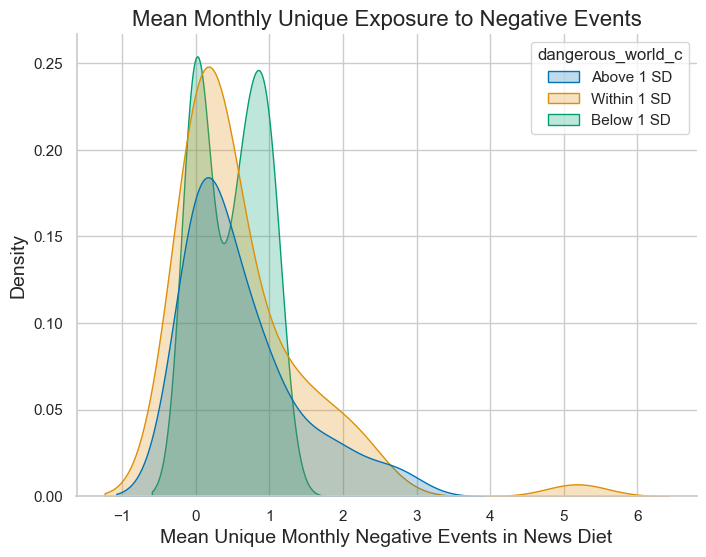

In [102]:
#visualise grouped neg event exposure distributions
plt.figure(figsize = (8, 6))
sns.kdeplot (x = "m_neg_unique_event_count", hue = "dangerous_world_c", data = id_unique_month_events_m, 
            hue_order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"],fill=True, 
            palette = "colorblind")
sns.despine()
plt.title("Mean Monthly Unique Exposure to Negative Events", fontsize=16)
plt.xlabel("Mean Unique Monthly Negative Events in News Diet", fontsize = 14)
plt.ylabel ("Density", fontsize = 14)
plt.show()

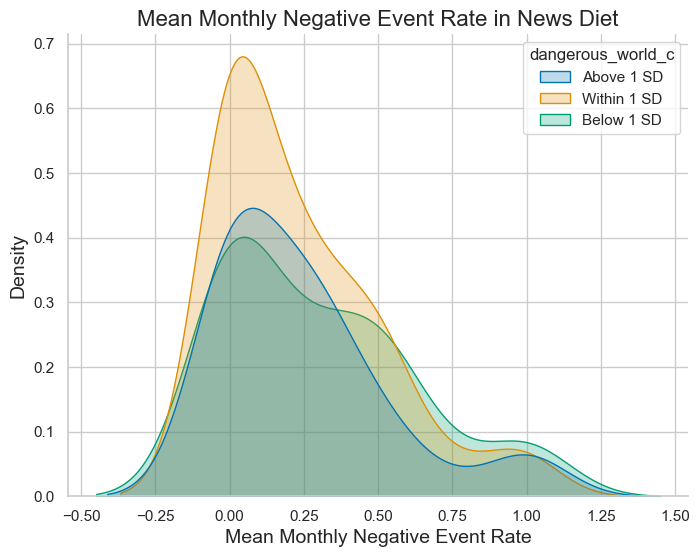

In [103]:
#visualise grouped neg event exposure distributions
# these both look highly similar to article exposure 
plt.figure(figsize = (8, 6))
sns.kdeplot (x = "m_month_neg_event_rate", hue = "dangerous_world_c", data = id_unique_month_events_m, 
            hue_order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"],fill=True, 
            palette = "colorblind")
sns.despine()
plt.title("Mean Monthly Negative Event Rate in News Diet", fontsize=16)
plt.xlabel("Mean Monthly Negative Event Rate", fontsize = 14)
plt.ylabel ("Density", fontsize = 14)
plt.show()

### >>> Articles Read per Events

In [104]:
# Entire timeframe, all articles
articles = events_survey.groupby(["submission_id", "clustNum"]).agg(
    articles_per_event = ("url", "size")).reset_index()
articles

,submission_id,clustNum,articles_per_event
0,ak001,153,1
1,ak001,493,4
2,ak001,500,2
3,as191243,184,1
4,as191243,609,2
...,...,...,...
1573,zl31826,394,2
1574,zl31826,395,1
1575,zl31826,396,2
1576,zl31826,609,1


In [105]:
# get everyone's overall means
articles_m = articles.groupby("submission_id")["articles_per_event"].mean().reset_index()

#join dws
articles_m = pd.merge(articles_m, dws, how = "left", on = "submission_id")

In [106]:
# descriptives 
articles_m.groupby("dangerous_world_c").agg(
    mean_art_event = ("articles_per_event", "mean"), 
    std_art_event = ("articles_per_event", "std")).reset_index()

,dangerous_world_c,mean_art_event,std_art_event
0,Above 1 SD,1.663606,1.262840
1,Below 1 SD,2.014320,1.532552
2,Within 1 SD,2.012008,1.459831


In [349]:
# get people's means for neutral articles 
neu_articles = events_survey[events_survey["Negativity_Label"]==0].groupby(["submission_id", "clustNum"]).agg(
    articles_per_neut_event = ("url", "size")).reset_index()

# get everyone's means
neu_articles_m = neu_articles.groupby("submission_id")["articles_per_neut_event"].mean().reset_index()

#join dws
neu_articles_m = pd.merge(neu_articles_m, dws, how = "left", on = "submission_id")

# descriptives 
neu_articles_m.groupby("dangerous_world_c").agg(
    mean_art_neut_event = ("articles_per_neut_event", "mean"), 
    std_art_neut_event = ("articles_per_neut_event", "std")).reset_index()

,dangerous_world_c,mean_art_neut_event,std_art_neut_event
0,Above 1 SD,1.749365,1.294292
1,Below 1 SD,2.216564,1.687814
2,Within 1 SD,2.158374,1.579480


In [107]:
#negative articles 
neg_articles = events_survey[events_survey["Negativity_Label"]==1].groupby(["submission_id", "clustNum"]).agg(
    articles_per_neg_event = ("url", "size")).reset_index()

# get everyone's means
neg_articles_m = neg_articles.groupby("submission_id")["articles_per_neg_event"].mean().reset_index()

#join dws
neg_articles_m = pd.merge(neg_articles_m, dws, how = "left", on = "submission_id")

# descriptives 
neg_articles_m.groupby("dangerous_world_c").agg(
    mean_art_neg_event = ("articles_per_neg_event", "mean"), 
    std_art_neg_event = ("articles_per_neg_event", "std")).reset_index()

,dangerous_world_c,mean_art_neg_event,std_art_neg_event
0,Above 1 SD,1.493549,1.788365
1,Below 1 SD,1.396091,0.764073
2,Within 1 SD,1.234145,0.308148


In [354]:
#visualise & merge outer to ensure all people are retained
articles_event_vis = pd.merge(neu_articles_m, neg_articles_m, how = "outer", on = ["submission_id", "dangerous_world_c"])

In [356]:
# fill NA' with 0
articles_event_vis.fillna(0, inplace=True)

In [422]:
articles_event_vis

,submission_id,articles_per_neut_event,dangerous_world_c,articles_per_neg_event
0,ak001,2.333333,Above 1 SD,0.0
1,as191243,1.000000,Within 1 SD,1.5
2,as191426,1.000000,Above 1 SD,1.0
3,as192017,1.555556,Below 1 SD,0.0
4,as2004,1.000000,Above 1 SD,1.0
...,...,...,...,...
135,js030,0.000000,Above 1 SD,1.0
136,js103,0.000000,Within 1 SD,1.0
137,js222,0.000000,Above 1 SD,1.0
138,k003,0.000000,Within 1 SD,1.0


In [361]:
# make longer 
articles_event_vis_m = articles_event_vis.melt(
    id_vars=["submission_id", "dangerous_world_c"], 
    value_vars = ["articles_per_neut_event", "articles_per_neg_event"], 
    var_name = "event_type", 
    value_name = "article_count")

In [364]:
articles_event_vis_m

,submission_id,dangerous_world_c,event_type,article_count
0,ak001,Above 1 SD,articles_per_neut_event,2.333333
1,as191243,Within 1 SD,articles_per_neut_event,1.000000
2,as191426,Above 1 SD,articles_per_neut_event,1.000000
3,as192017,Below 1 SD,articles_per_neut_event,1.555556
4,as2004,Above 1 SD,articles_per_neut_event,1.000000
...,...,...,...,...
275,js030,Above 1 SD,articles_per_neg_event,1.000000
276,js103,Within 1 SD,articles_per_neg_event,1.000000
277,js222,Above 1 SD,articles_per_neg_event,1.000000
278,k003,Within 1 SD,articles_per_neg_event,1.000000


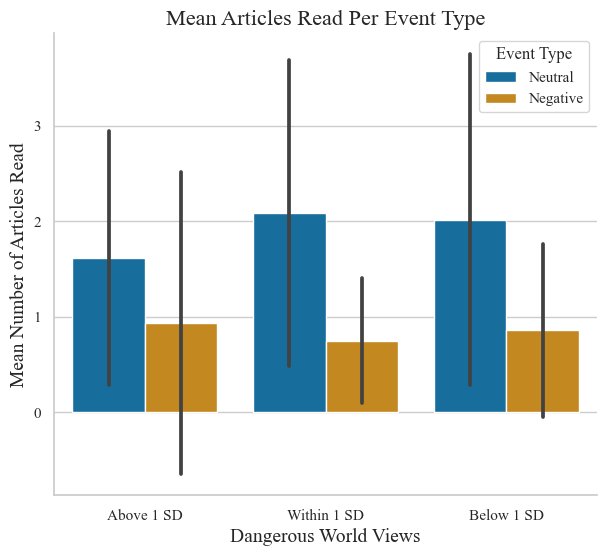

In [376]:
sns.set_style("whitegrid", {"font.family":"Times New Roman"})
plt.figure(figsize=(7,6))
bar_plot = sns.barplot (x = "dangerous_world_c", y = "article_count", data = articles_event_vis_m, 
             order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"],
             estimator = "mean", errorbar = "sd", hue = "event_type", palette = "colorblind")
plt.title ("Mean Articles Read Per Event Type", fontsize=16)
plt.xlabel ("Dangerous World Views", fontsize=14)
plt.ylabel ("Mean Number of Articles Read", fontsize=14)
# Get the current legend handles and labels
handles, labels = bar_plot.get_legend_handles_labels()
plt.legend(handles = handles, title="Event Type", labels=["Neutral", "Negative"])
sns.despine()
plt.show()

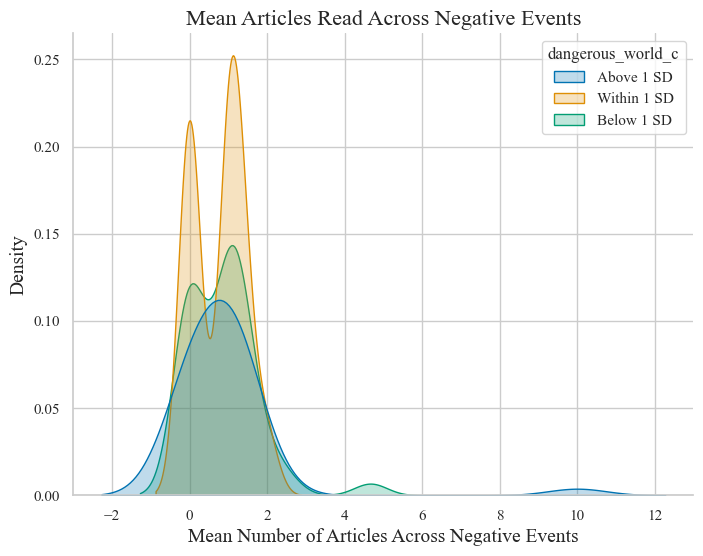

In [423]:
#visualise grouped neg event exposure distributions
plt.figure(figsize = (8, 6))
sns.kdeplot (x = "articles_per_neg_event", hue = "dangerous_world_c", data = articles_event_vis, 
            hue_order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"],fill=True, 
            palette = "colorblind")
sns.despine()
plt.title("Mean Articles Read Across Negative Events", fontsize=16)
plt.xlabel("Mean Number of Articles Across Negative Events", fontsize = 14)
plt.ylabel ("Density", fontsize = 14)
plt.show()

### Monthly

In [108]:
articles_monthly = events_survey.groupby(["submission_id", "clustNum", "month"]).agg(
    number_articles_per_event = ("url", "size")).reset_index()

In [109]:
# every person's average number of articles read per event per month 
articles_monthly_dws = articles_monthly.groupby("submission_id").agg(
    mean_number_articles_event_month = ("number_articles_per_event", "mean"), 
    std_number_articles_event_month = ("number_articles_per_event", "std")).reset_index()

articles_monthly_dws = pd.merge(articles_monthly_dws, dws, how = "left", on = "submission_id")

articles_monthly_dws

,submission_id,mean_number_articles_event_month,std_number_articles_event_month,dangerous_world_c
0,ak001,2.333333,1.527525,Above 1 SD
1,as191243,1.333333,0.577350,Within 1 SD
2,as191426,1.000000,0.000000,Above 1 SD
3,as192017,1.272727,0.646670,Below 1 SD
4,as2004,1.000000,0.000000,Above 1 SD
...,...,...,...,...
135,zl31702,2.800000,3.492850,Above 1 SD
136,zl31712,1.000000,NaN,Below 1 SD
137,zl31721,1.000000,NaN,Above 1 SD
138,zl31732,2.000000,1.414214,Above 1 SD


In [110]:
#group by dws 
articles_monthly_dws.groupby("dangerous_world_c").agg(
    m_articles_events_month=("mean_number_articles_event_month", "mean"),
    std_articles_events_month=("mean_number_articles_event_month", "std"))

,m_articles_events_month,std_articles_events_month
dangerous_world_c,,
Above 1 SD,1.662154,1.263251
Below 1 SD,1.983284,1.505312
Within 1 SD,2.003862,1.460790


In [111]:
# articles per negative events on month level 
neg_articles_monthly = events_survey[events_survey["Negativity_Label"]==1].groupby(["submission_id", "clustNum", "month"]).agg(
    number_articles_per_neg_event = ("url", "size")).reset_index()

# every person's average number of articles read per event per month 
neg_articles_monthly_dws = neg_articles_monthly.groupby("submission_id").agg(
    mean_number_articles_neg_event_month = ("number_articles_per_neg_event", "mean"), 
    std_number_articles_neg_event_month = ("number_articles_per_neg_event", "std")).reset_index()

neg_articles_monthly_dws = pd.merge(neg_articles_monthly_dws, dws, how = "left", on = "submission_id")

#group by dws 
neg_articles_monthly_dws.groupby("dangerous_world_c").agg(
    m_articles_neg_events_month=("mean_number_articles_neg_event_month", "mean"),
    std_articles_neg_events_month=("mean_number_articles_neg_event_month", "std"))

,m_articles_neg_events_month,std_articles_neg_events_month
dangerous_world_c,,
Above 1 SD,1.489742,1.788619
Below 1 SD,1.365226,0.734006
Within 1 SD,1.219093,0.301721


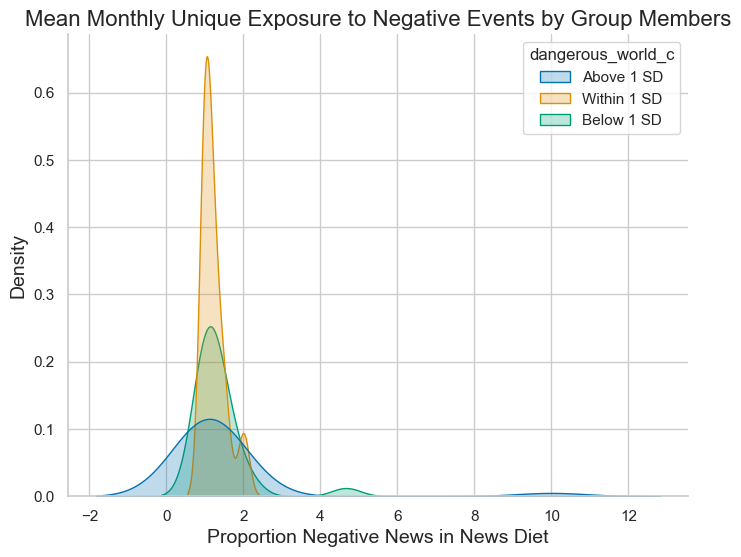

In [114]:
#visualise grouped neg event exposure distributions
plt.figure(figsize = (8, 6))
sns.kdeplot (x = "mean_number_articles_neg_event_month", hue = "dangerous_world_c", data = neg_articles_monthly_dws, 
            hue_order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"],fill=True, 
            palette = "colorblind")
sns.despine()
plt.title("Mean Monthly Unique Exposure to Negative Events by Group Members", fontsize=16)
plt.xlabel("Proportion Negative News in News Diet", fontsize = 14)
plt.ylabel ("Density", fontsize = 14)
plt.show()

### >>> Correlation of neg event proportion and dws: 

In [116]:
neg_events_dws_corr = event_rate[["submission_id", "neg_event_rate", "dangerous_world"]]

In [117]:
from scipy import stats
import pandas as pd

# Compute Pearson correlation and p-value
pearson_corr, p_value = stats.pearsonr(neg_events_dws_corr['neg_event_rate'], neg_events_dws_corr['dangerous_world'])

In [118]:
pearson_corr

-0.1086351079516203

In [119]:
p_value #n.s.

0.20137332560818708

### >>> Visualise grouped distribution

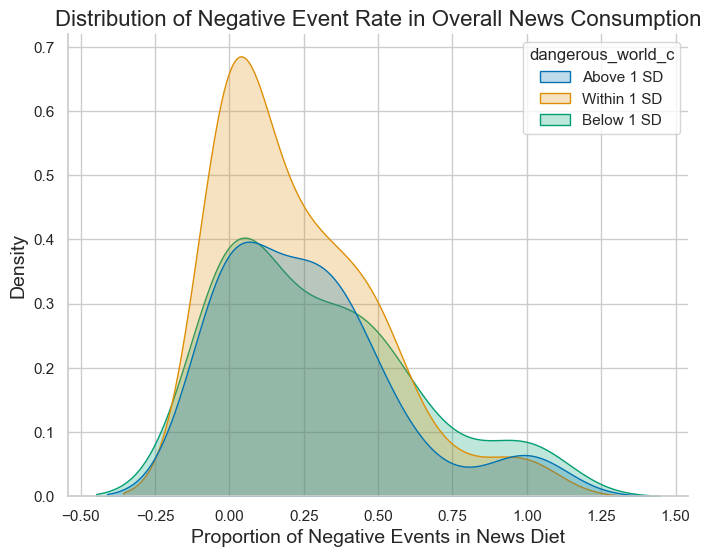

In [120]:
sns.set_style("whitegrid")
plt.figure(figsize = (8, 6))
sns.kdeplot (x = "neg_event_rate", hue = "dangerous_world_c", data = event_rate, 
            hue_order = ["Above 1 SD", "Within 1 SD", "Below 1 SD"],fill=True, 
            palette = "colorblind")
sns.despine()
plt.title("Distribution of Negative Event Rate in Overall News Consumption", fontsize=16)
plt.xlabel("Proportion of Negative Events in News Diet", fontsize = 14)
plt.ylabel ("Density", fontsize = 14)
plt.show()

### >>> Group proportion of negative events: 

In [121]:
group_props_events = event_rate.groupby("dangerous_world_c").agg(
    ev_group_mean_prop = ("neg_event_rate", "mean"), 
    ev_group_std_prop = ("neg_event_rate", "std")).reset_index()
group_props_events

,dangerous_world_c,ev_group_mean_prop,ev_group_std_prop
0,Above 1 SD,0.262635,0.286660
1,Below 1 SD,0.298199,0.318005
2,Within 1 SD,0.232334,0.265125


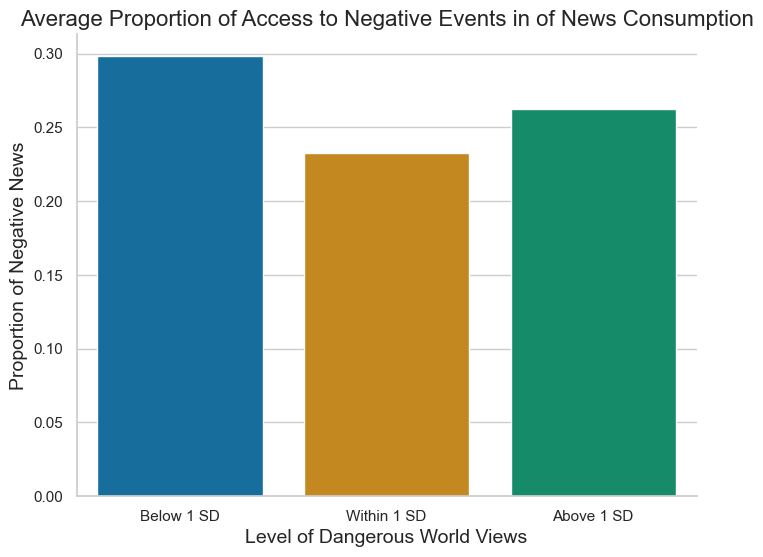

In [122]:
# visualise 
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize = (8, 6))
ax = sns.barplot(x = 'dangerous_world_c', y = 'ev_group_mean_prop', data = group_props_events, 
                order = ["Below 1 SD", "Within 1 SD", "Above 1 SD"], 
                palette = "colorblind")

# Customize the plot
ax.set_title('Average Proportion of Access to Negative Events in of News Consumption', fontsize = 16)
ax.set_xlabel('Level of Dangerous World Views', fontsize = 14)
ax.set_ylabel('Proportion of Negative News', fontsize = 14)

sns.despine()
# Show the plot
plt.show()

In [123]:
#select only required columns (here: each row represents one submission id's mean negativity level)
diff_means_events = event_rate[["dangerous_world_c", "neg_event_rate"]]

# Fit the model
model2 = ols('neg_event_rate ~ C(dangerous_world_c)', data=diff_means_events).fit()

# Perform ANOVA
anova_table3 = sm.stats.anova_lm(model2, typ=2)

print(anova_table3)

                         sum_sq     df         F    PR(>F)
C(dangerous_world_c)   0.106945    2.0  0.641523  0.528064
Residual              11.419289  137.0       NaN       NaN


In [124]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
posthoc_tukey_events = pairwise_tukeyhsd(diff_means_events['neg_event_rate'], diff_means_events['dangerous_world_c'])
print(posthoc_tukey_events)

# reject here means there is a statistically significant difference (see p)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2   meandiff p-adj   lower  upper  reject
------------------------------------------------------------
Above 1 SD  Below 1 SD   0.0356 0.8395 -0.1139  0.185  False
Above 1 SD Within 1 SD  -0.0303 0.8681 -0.1719 0.1113  False
Below 1 SD Within 1 SD  -0.0659 0.4958 -0.2037 0.0719  False
------------------------------------------------------------


## >> 3.3. Over-time developments of negative news article & event selection

## >> 3.3. Over-time analysis (monthly)

In [125]:
month_neg_news.head()

,month,submission_id,count_neg_month,count_total_month,neg_rate_month
0,2021-09,as191426,2,4,0.500000
1,2021-09,as2005,1,1,1.000000
2,2021-09,cm191733,0,3,0.000000
3,2021-09,cm211229,6,19,0.315789
4,2021-09,cm211236,0,1,0.000000


In [127]:
month_neg_news = pd.merge(month_neg_news, dws, how = "left", on = "submission_id")

In [128]:
# now I have: for every month and person, I have their negativity rate. 
# Now I can: group by dws and month to get the group's average negativity rates.
grouped_neg_news_m = month_neg_news.groupby(["month", "dangerous_world_c"])["neg_rate_month"].mean().reset_index()

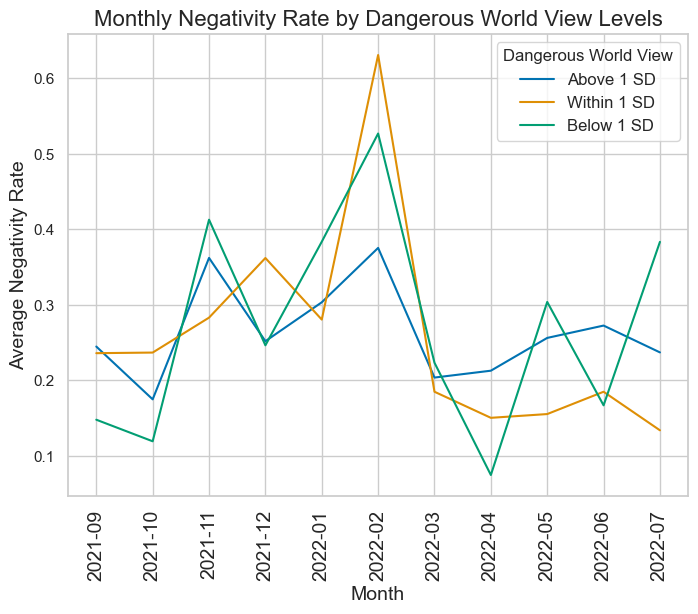

In [130]:
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize = (8, 6))
sns.lineplot(x='month', y='neg_rate_month', hue='dangerous_world_c', data=grouped_neg_news_m, 
            hue_order=["Above 1 SD", "Within 1 SD", "Below 1 SD"], 
            palette = "colorblind")
plt.title('Monthly Negativity Rate by Dangerous World View Levels', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Negativity Rate', fontsize=14)
plt.legend(title='Dangerous World View', fontsize=12)
plt.xticks(fontsize=14, rotation=90)  

# Show the plot
plt.show()

### Interpretation: 
- We see the monthly negativity rate peaks in februrary– What happened during this time? 

In [131]:
topics_months = events_survey.dropna(subset="Event_Topic")

In [132]:
#filter for only neg events 
topics_months = topics_months[topics_months["Negativity_Label"]==1]

In [133]:
# Check the topics annotated for each month
topics_months = topics_months.groupby("month")["Event_Topic"].apply(list).reset_index()

# filter for february
feb = topics_months[topics_months["month"]=="2022-02"]

# each article about a topic in one row
feb = feb.explode("Event_Topic")

# get event size (number of articles about same event)
event_size_df = feb.groupby('Event_Topic').agg(event_size=('Event_Topic', 'count')).reset_index()

# merge back on feb to get only size for each topic
feb = pd.merge(feb, event_size_df, how = "left", on = "Event_Topic")

In [138]:
# inspect
feb.drop_duplicates(subset="Event_Topic").sort_values(by = "event_size", ascending = False)

,month,Event_Topic,event_size
0,2022-02,Code Red for Storm Eunice,23
96,2022-02,Pictures of Storm destruction,10
30,2022-02,Increasing Corona cases among young people,9
49,2022-02,Rapper Lil Kleine assaults girlfriend,8
45,2022-02,Russia attacks Ukraine,7
2,2022-02,Russia withdraws part of personnel from Ukrain...,7
60,2022-02,Photos of local storm destruction,7
16,2022-02,Overmas transgressive behaviour,4
24,2022-02,Apple Store Hostage Taker Dies from Injuries,4
42,2022-02,Ukraine declares state of emergency,4


### Interpretation:
Looking at the df, we see that in this period there was: 
- Internationally: Russian invasion of Ukraine 
- National: 
     - Hostage taking in the Amsterdam Apple Store
     - Code Red Storm Eunice, causing damages

### 3.3.2. Predicting negativity with time 

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [140]:
month_neg_news.head()

,month,submission_id,count_neg_month,count_total_month,neg_rate_month,dangerous_world_c
0,2021-09,as191426,2,4,0.500000,Above 1 SD
1,2021-09,as2005,1,1,1.000000,Above 1 SD
2,2021-09,cm191733,0,3,0.000000,Within 1 SD
3,2021-09,cm211229,6,19,0.315789,Within 1 SD
4,2021-09,cm211236,0,1,0.000000,Below 1 SD


In [141]:
# create corresponding months 
month_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [142]:
unique_months_sorted = pd.Series(month_neg_news["month"].unique()).sort_values()

In [143]:
num_months = pd.DataFrame(list(zip(month_num, unique_months_sorted)), columns=['month_num', 'month'])

In [144]:
#join with month neg news 
month_neg_news = pd.merge(month_neg_news, num_months, how = "left", on = "month")

In [145]:
month_neg_news

,month,submission_id,count_neg_month,count_total_month,neg_rate_month,dangerous_world_c,month_num
0,2021-09,as191426,2,4,0.500000,Above 1 SD,1
1,2021-09,as2005,1,1,1.000000,Above 1 SD,1
2,2021-09,cm191733,0,3,0.000000,Within 1 SD,1
3,2021-09,cm211229,6,19,0.315789,Within 1 SD,1
4,2021-09,cm211236,0,1,0.000000,Below 1 SD,1
...,...,...,...,...,...,...,...
542,2022-07,ts008,0,2,0.000000,Within 1 SD,11
543,2022-07,zl1805,0,1,0.000000,Within 1 SD,11
544,2022-07,zl21330,0,1,0.000000,Above 1 SD,11
545,2022-07,zl31337,7,42,0.166667,Within 1 SD,11


<Figure size 1000x600 with 0 Axes>

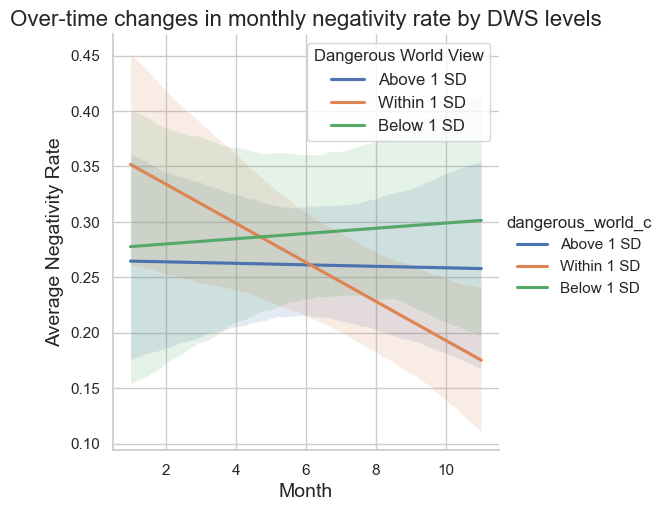

In [146]:
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize = (10, 6))
sns.lmplot(x='month_num', y='neg_rate_month', hue='dangerous_world_c', data=month_neg_news, 
          hue_order=["Above 1 SD", "Within 1 SD", "Below 1 SD"], 
          scatter = False)
plt.title('Over-time changes in monthly negativity rate by DWS levels', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Negativity Rate', fontsize=14)
plt.legend(title='Dangerous World View', fontsize=12)
sns.despine()

# Show the plot
plt.show()

In [147]:
dws_week_neg = pd.merge(week_neg_news, dws, how = "left", on = "submission_id")
dws_week_neg.head()

,week_number,submission_id,count_neg_week,count_total_week,neg_rate_week,dangerous_world_c
0,1,as191426,1,1,1.0,Above 1 SD
1,1,as2004,0,1,0.0,Above 1 SD
2,1,j004,3,3,1.0,Within 1 SD
3,1,js007,0,1,0.0,Below 1 SD
4,1,js020,0,1,0.0,NaN


<Figure size 800x600 with 0 Axes>

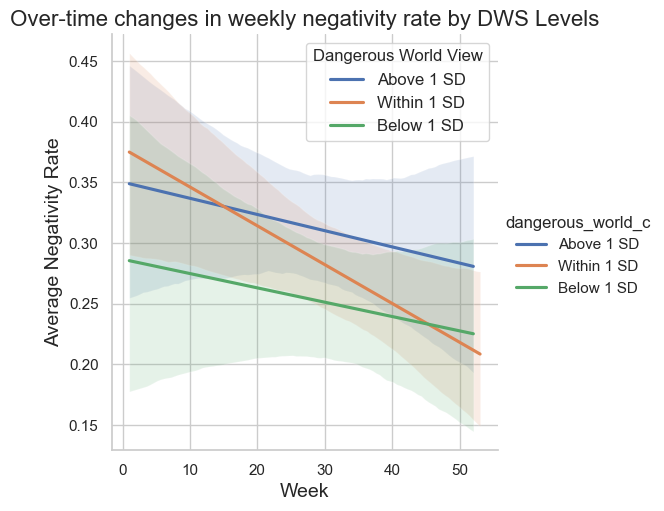

In [148]:
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize = (8, 6))
sns.lmplot(x='week_number', y='neg_rate_week', hue='dangerous_world_c', data=dws_week_neg, 
          hue_order=["Above 1 SD", "Within 1 SD", "Below 1 SD"], 
          scatter = False)
plt.title('Over-time changes in weekly negativity rate by DWS Levels', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Average Negativity Rate', fontsize=14)
plt.legend(title='Dangerous World View', fontsize=12)
sns.despine()

# Show the plot
plt.show()

### Who accesses the most news across the year?

In [149]:
news_access = events_survey[["submission_id", "date_accessed", "clustNum", "Negativity_Label","dangerous_world_c", "url"]]

In [150]:
# count total number of news visits for each person
id_news_access = news_access.groupby(["submission_id"]).agg(
    id_news_count = ("url", "size")).reset_index()

In [151]:
id_news_access

,submission_id,id_news_count
0,ak001,7
1,as191243,4
2,as191426,7
3,as192017,14
4,as2004,4
...,...,...
135,zl31702,14
136,zl31712,1
137,zl31721,1
138,zl31732,4


In [152]:
# get participants dws (join with dws created earlier)
id_news_access = id_news_access.merge(dws, how = "left", on = "submission_id")

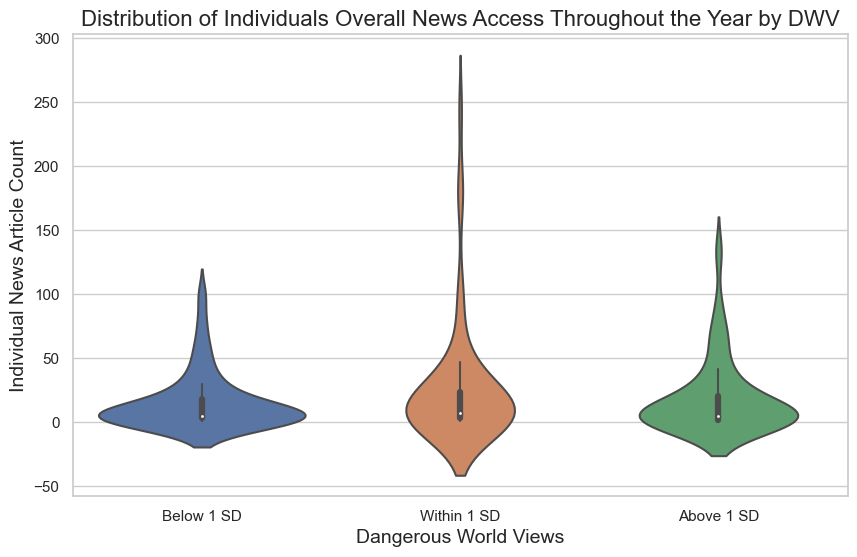

In [153]:
# plot distribution of negative news access
sns.set_style("whitegrid")
plt.figure(figsize = (10, 6))
sns.violinplot(x='dangerous_world_c', y = 'id_news_count', data = id_news_access, split=True, 
              order = ["Below 1 SD", "Within 1 SD", "Above 1 SD"])
plt.title('Distribution of Individuals Overall News Access Throughout the Year by DWV', fontsize=16)
plt.xlabel('Dangerous World Views', fontsize = 14)
plt.ylabel ('Individual News Article Count', fontsize = 14)
plt.savefig("news_access_throughout_year.pdf", bbox_inches="tight")

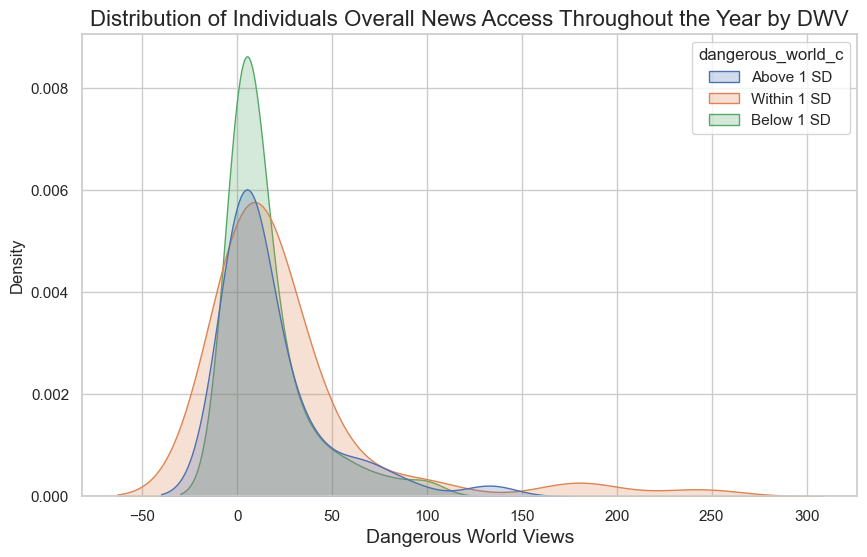

In [154]:
# do it with kde 
sns.set_style("whitegrid")
plt.figure(figsize = (10,6))
sns.kdeplot(x = 'id_news_count', hue = 'dangerous_world_c', data = id_news_access, fill=True,
           hue_order=["Above 1 SD", "Within 1 SD", "Below 1 SD"])
plt.title('Distribution of Individuals Overall News Access Throughout the Year by DWV', fontsize=16)
plt.xlabel('Dangerous World Views', fontsize = 14)
#plt.ylabel ('Individual News Article Count', fontsize = 14)
plt.show()

### Who accesses the most negative news across the year?

In [155]:
news_access_n = events_survey[["submission_id", "date_accessed", "clustNum", "Negativity_Label","dangerous_world_c", "url"]]

In [156]:
news_access_n = news_access_n[news_access_n["Negativity_Label"]==1]

In [157]:
# count total number of news visits for each person
id_news_access_n = news_access_n.groupby(["submission_id"]).agg(
    id_news_count_n = ("url", "size")).reset_index()

In [158]:
id_news_access_n

,submission_id,id_news_count_n
0,as191243,3
1,as191426,2
2,as2004,1
3,as2005,10
4,as2101,2
...,...,...
81,zl31337,70
82,zl31401,1
83,zl31418,1
84,zl31653,2


In [159]:
# get participants dws (join with dws created earlier)
id_news_access_n = id_news_access_n.merge(dws, how = "left", on = "submission_id")

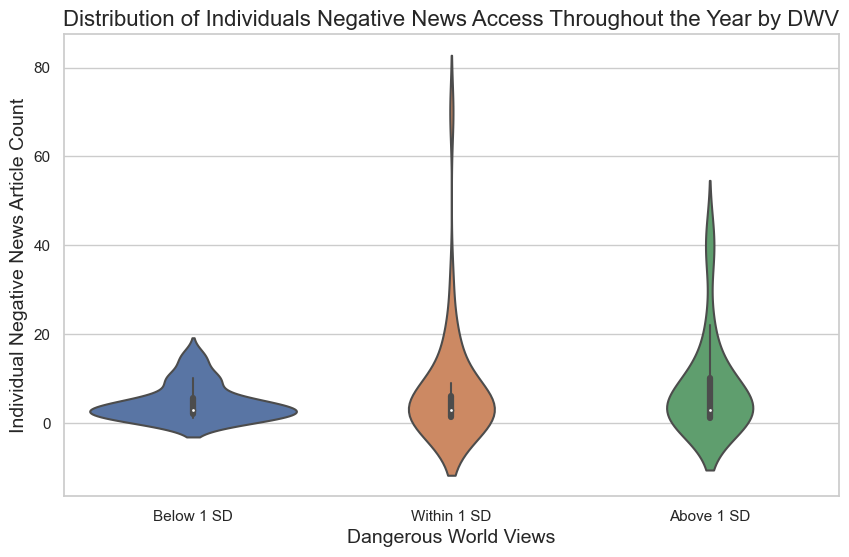

In [160]:
# plot distribution of negative news access
sns.set_style("whitegrid")
plt.figure(figsize = (10, 6))
sns.violinplot(x='dangerous_world_c', y = 'id_news_count_n', data = id_news_access_n, split=True, 
                order = ["Below 1 SD", "Within 1 SD", "Above 1 SD"])
plt.title('Distribution of Individuals Negative News Access Throughout the Year by DWV', fontsize=16)
plt.xlabel('Dangerous World Views', fontsize = 14)
plt.ylabel ('Individual Negative News Article Count', fontsize = 14)
plt.savefig("neg_news_access_throughout_year.pdf", bbox_inches="tight")


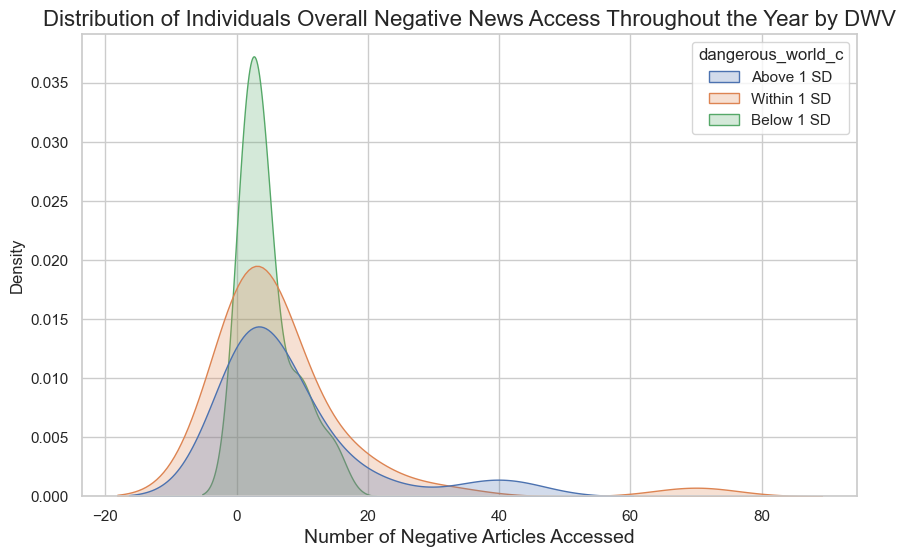

In [161]:
# do it with kde 
sns.set_style("whitegrid")
plt.figure(figsize = (10,6))
sns.kdeplot(x = 'id_news_count_n', hue = 'dangerous_world_c', data = id_news_access_n, fill=True,
           hue_order=["Above 1 SD", "Within 1 SD", "Below 1 SD"])
plt.title('Distribution of Individuals Overall Negative News Access Throughout the Year by DWV', fontsize=16)
plt.xlabel('Number of Negative Articles Accessed', fontsize = 14)
#plt.ylabel ('Individual News Article Count', fontsize = 14)
plt.show()

## Rate of *change* in total news consumption from one month to the next against the rate of negative versus neutral news

- (1) For each person, calculate their *change* in news consumption from one month to the next 
- (2) For each person, calculate the *monthly negativity ratio*
- (3) For each group, plot both the change and monthly negativity rate.

In [162]:
month_neg_news.head(2)

,month,submission_id,count_neg_month,count_total_month,neg_rate_month,dangerous_world_c,month_num
0,2021-09,as191426,2,4,0.5,Above 1 SD,1
1,2021-09,as2005,1,1,1.0,Above 1 SD,1


In [163]:
# to get the *change* in negativity rate and the *change* in news consumption 

# Complete list of months from min to max month
all_months = pd.date_range(month_neg_news["month"].min(), month_neg_news["month"].max(), freq="MS")

# Get unique submission_ids
submission_ids = month_neg_news["submission_id"].unique()

# Create df with all possible submission ID/month combinations
all_combinations = pd.MultiIndex.from_product([submission_ids, all_months], names=["submission_id", "month"]).to_frame(index=False)

# convert month to the same format as in month neg news 
all_combinations["month"] = all_combinations["month"].dt.strftime("%Y-%m")

In [284]:
all_combinations.head(2)

,submission_id,month
0,as191426,2021-09
1,as191426,2021-10


In [285]:
# now: I have all sumbission ID-month combinations. 
# Merge with the original data to add the missing months for each participant
month_neg_news_complete = pd.merge(all_combinations, month_neg_news, on=["submission_id", "month"], how="left")

In [286]:
# fill NA's from dangerous world views with first valid occurence from each participant
month_neg_news_complete["dangerous_world_c"] = month_neg_news_complete.groupby("submission_id")["dangerous_world_c"].transform("first")

In [287]:
# fill NA's in the missing columns
month_neg_news_complete.fillna(0, inplace=True)

In [295]:
# get average monthly news consumption by group 
month_news_desc = month_neg_news_complete.groupby("submission_id").agg(
    total_news_cons = ("count_total_month", "mean"), 
    abs_neg_month = ("count_neg_month", "mean")).reset_index()
month_news_desc

,submission_id,total_news_cons,abs_neg_month
0,ak001,0.636364,0.000000
1,as191243,0.363636,0.272727
2,as191426,0.636364,0.181818
3,as192017,1.272727,0.000000
4,as2004,0.363636,0.090909
...,...,...,...
135,zl31702,1.272727,0.000000
136,zl31712,0.090909,0.000000
137,zl31721,0.090909,0.000000
138,zl31732,0.363636,0.000000


In [325]:
month_news_desc["total_news_cons"].mean()

1.8688311688311687

In [326]:
month_news_desc["total_news_cons"].std()

3.284230047515376

In [327]:
month_news_desc["abs_neg_month"].mean()

0.37727272727272726

In [328]:
month_news_desc["abs_neg_month"].std()

0.7932713195422036

In [297]:
# get descriptives per group 
grouped_month_desc = pd.merge(month_news_desc, dws, how = "left", on = "submission_id")
grouped_month_desc.groupby("dangerous_world_c").agg(
    mean_monthly_news_consumption = ("total_news_cons", "mean"), 
    std_monthly_news_comsumption = ("total_news_cons", "std"), 
    mean_monthly_neg_news_consumption = ("abs_neg_month", "mean"), 
    std_monthly_neg_news_consumption = ("abs_neg_month", "std")).reset_index()


,dangerous_world_c,mean_monthly_news_consumption,std_monthly_news_comsumption,mean_monthly_neg_news_consumption,std_monthly_neg_news_consumption
0,Above 1 SD,1.663636,2.603419,0.456818,0.865992
1,Below 1 SD,1.396694,1.995680,0.260331,0.353229
2,Within 1 SD,2.386364,4.342589,0.412338,0.971721


In [300]:
grouped_month_desc

,submission_id,total_news_cons,abs_neg_month,dangerous_world_c
0,ak001,0.636364,0.000000,Above 1 SD
1,as191243,0.363636,0.272727,Within 1 SD
2,as191426,0.636364,0.181818,Above 1 SD
3,as192017,1.272727,0.000000,Below 1 SD
4,as2004,0.363636,0.090909,Above 1 SD
...,...,...,...,...
135,zl31702,1.272727,0.000000,Above 1 SD
136,zl31712,0.090909,0.000000,Below 1 SD
137,zl31721,0.090909,0.000000,Above 1 SD
138,zl31732,0.363636,0.000000,Above 1 SD


In [452]:
grouped_month_desc_l = grouped_month_desc.melt(
    id_vars=["submission_id", "dangerous_world_c"], 
    value_vars=["total_news_cons", "abs_neg_month"],
    var_name = "news_use_type",
    value_name ="means")
grouped_month_desc_l

,submission_id,dangerous_world_c,news_use_type,means
0,ak001,Above 1 SD,total_news_cons,0.636364
1,as191243,Within 1 SD,total_news_cons,0.363636
2,as191426,Above 1 SD,total_news_cons,0.636364
3,as192017,Below 1 SD,total_news_cons,1.272727
4,as2004,Above 1 SD,total_news_cons,0.363636
...,...,...,...,...
275,zl31702,Above 1 SD,abs_neg_month,0.000000
276,zl31712,Below 1 SD,abs_neg_month,0.000000
277,zl31721,Above 1 SD,abs_neg_month,0.000000
278,zl31732,Above 1 SD,abs_neg_month,0.000000


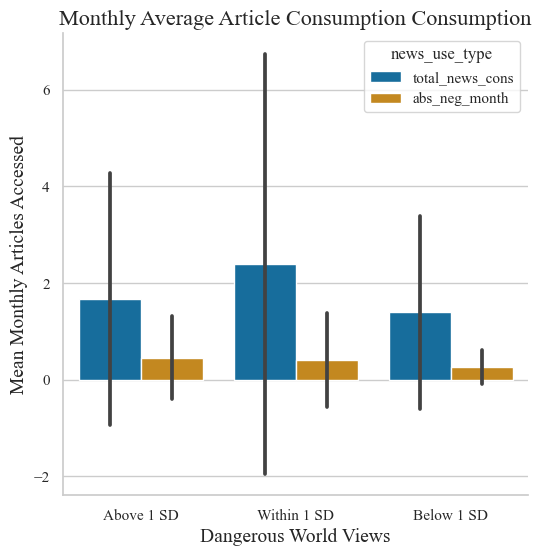

In [454]:
# visualise descriptives 
sns.set_style("whitegrid", {'font.family': 'Times New Roman'})
plt.figure(figsize=(6, 6))
sns.barplot(x = "dangerous_world_c", y = "means", hue="news_use_type", data = grouped_month_desc_l, errorbar = "sd", 
           order=["Above 1 SD", "Within 1 SD", "Below 1 SD"], palette = "colorblind")
plt.title("Monthly Average Article Consumption Consumption", fontsize=16)
plt.xlabel ("Dangerous World Views", fontsize = 14)
plt.ylabel ("Mean Monthly Articles Accessed", fontsize=14)
sns.despine()
plt.show()

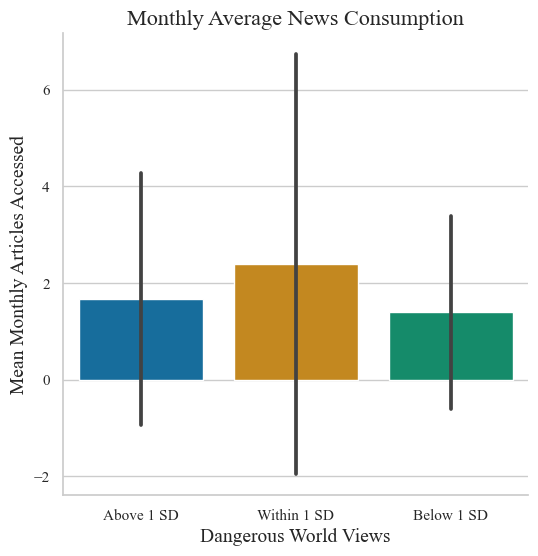

In [315]:
# visualise descriptives 
sns.set_style("whitegrid", {'font.family': 'Times New Roman'})
plt.figure(figsize=(6, 6))
sns.barplot(x = "dangerous_world_c", y = "total_news_cons", data = grouped_month_desc, errorbar = "sd", 
           order=["Above 1 SD", "Within 1 SD", "Below 1 SD"], palette = "colorblind")
plt.title("Monthly Average News Consumption", fontsize=16)
plt.xlabel ("Dangerous World Views", fontsize = 14)
plt.ylabel ("Mean Monthly Articles Accessed", fontsize=14)
sns.despine()
plt.show()

<Axes: xlabel='total_news_cons', ylabel='Density'>

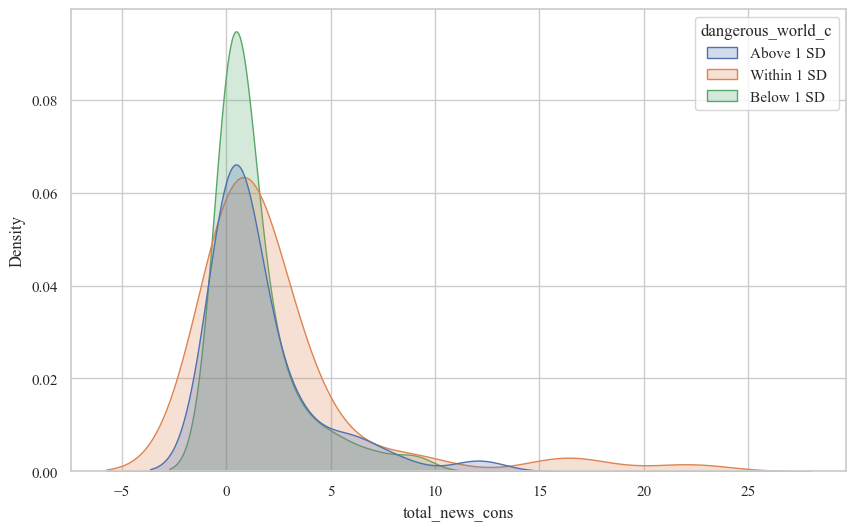

In [307]:
# look at distribution 
sns.set_style("whitegrid", {"font.family":"Times New Roman"})
plt.figure(figsize=(10, 6))
sns.kdeplot(x = "total_news_cons", hue = "dangerous_world_c", data = grouped_month_desc, 
           fill=True)

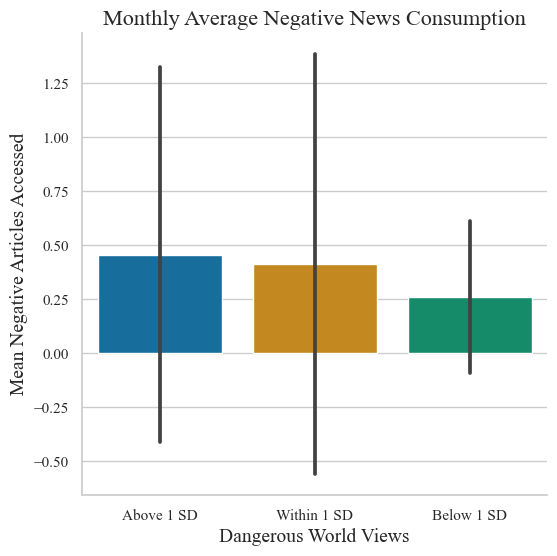

In [319]:
# monthly average negative news consumption
# visualise descriptives 
sns.set_style("whitegrid", {'font.family': 'Times New Roman'})
plt.figure(figsize=(6, 6))
sns.barplot(x = "dangerous_world_c", y = "abs_neg_month", data = grouped_month_desc, errorbar = "sd", 
           order=["Above 1 SD", "Within 1 SD", "Below 1 SD"], palette = "colorblind")
plt.title("Monthly Average Negative News Consumption", fontsize=16)
plt.xlabel ("Dangerous World Views", fontsize = 14)
plt.ylabel ("Mean Negative Articles Accessed", fontsize=14)
sns.despine()
plt.show()

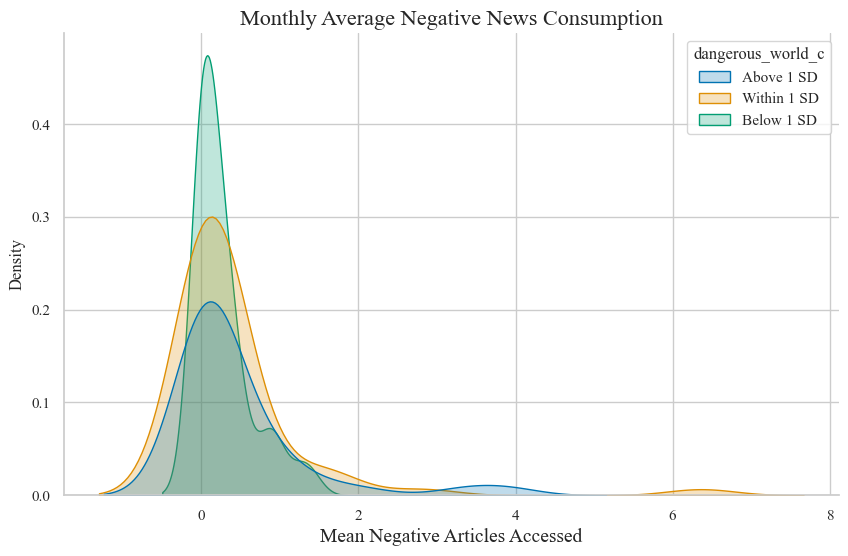

In [322]:
# look at distribution 
sns.set_style("whitegrid", {"font.family":"Times New Roman"})
plt.figure(figsize=(10, 6))
sns.kdeplot(x = "abs_neg_month", hue = "dangerous_world_c", data = grouped_month_desc, 
           fill=True, palette = "colorblind")
plt.title("Monthly Average Negative News Consumption", fontsize=16)
plt.xlabel ("Mean Negative Articles Accessed", fontsize=14)
sns.despine()
plt.show()

In [455]:
# formally: differences in means test between the three groups 
import statsmodels.api as sm
from statsmodels.formula.api import ols

#select only required columns (here: each row represents one submission id's mean negativity level)
diff_means_month = grouped_month_desc[["dangerous_world_c", "abs_neg_month"]]

# Fit the model
model_month = ols('abs_neg_month ~ C(dangerous_world_c)', data=diff_means_month).fit()

# Perform ANOVA
anova_table_month = sm.stats.anova_lm(model_month, typ=2)

print(anova_table_month)

                         sum_sq     df         F   PR(>F)
C(dangerous_world_c)   0.923674    2.0  0.731075  0.48326
Residual              86.546160  137.0       NaN      NaN


In [456]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
posthoc_tukey_month = pairwise_tukeyhsd(diff_means_month['abs_neg_month'], diff_means_month['dangerous_world_c'])
print(posthoc_tukey_month)

# no statistically significant difference between the groups

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2   meandiff p-adj   lower  upper  reject
------------------------------------------------------------
Above 1 SD  Below 1 SD  -0.1965 0.4963 -0.6079 0.2149  False
Above 1 SD Within 1 SD  -0.0445 0.9605 -0.4344 0.3454  False
Below 1 SD Within 1 SD    0.152 0.6101 -0.2274 0.5314  False
------------------------------------------------------------


In [457]:
# formally: differences in means test between the three groups 
import statsmodels.api as sm
from statsmodels.formula.api import ols

#select only required columns (here: each row represents one submission id's mean negativity level)
diff_means_month = grouped_month_desc[["dangerous_world_c", "total_news_cons"]]

# Fit the model
model_month = ols('total_news_cons ~ C(dangerous_world_c)', data=diff_means_month).fit()

# Perform ANOVA
anova_table_month = sm.stats.anova_lm(model_month, typ=2)

print(anova_table_month)

                           sum_sq     df         F    PR(>F)
C(dangerous_world_c)    26.491414    2.0  1.232129  0.294882
Residual              1472.785800  137.0       NaN       NaN


In [459]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
posthoc_tukey_month = pairwise_tukeyhsd(diff_means_month['total_news_cons'], diff_means_month['dangerous_world_c'])
print(posthoc_tukey_month)

# no statistically significant difference between the groups

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1      group2   meandiff p-adj   lower  upper  reject
------------------------------------------------------------
Above 1 SD  Below 1 SD  -0.2669 0.9263 -1.9642 1.4303  False
Above 1 SD Within 1 SD   0.7227 0.5375 -0.8856  2.331  False
Below 1 SD Within 1 SD   0.9897 0.2949 -0.5754 2.5548  False
------------------------------------------------------------


In [448]:
# now I have: for every month and person, I have their negativity rate. 
# Now I can: group by dws and month to get the group's average negativity rates.
grouped_neg_news_abs = month_neg_news_complete.groupby(["month", "dangerous_world_c"])["count_neg_month"].mean().reset_index()

# pivot for plot
#grouped_neg_news_abs_piv = grouped_neg_news_abs.pivot(index="month", columns="dangerous_world_c", values="count_neg_month")


In [ ]:
sns.set_style("whitegrid", {"font.family":"Times New Roman"})

# Create the bar plot
plt.figure(figsize = (8, 6))
sns.lineplot(x='month', y='count_neg_month', hue='dangerous_world_c', data=grouped_neg_news_abs, 
            hue_order=["Above 1 SD", "Within 1 SD", "Below 1 SD"], 
            palette = "colorblind")
plt.title('Monthly Negativity Exposure by Dangerous World View Levels', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Negative Article Consumption', fontsize=14)
plt.legend(title='Dangerous World Views', fontsize=12)
plt.xticks(fontsize=14, rotation=90)  

# Show the plot
plt.show()

## >> Correlation between change in negativity and change in news consumption (same month)

In [394]:
# calculate the monthly change 
monthly_chng_total = month_neg_news_complete.sort_values(by=["submission_id", "month"])

monthly_chng_total["monthly_change_news_consumption"] = monthly_chng_total.groupby("submission_id")["count_total_month"].diff()

monthly_chng_total["monthly_change_neg_rate"] = monthly_chng_total.groupby("submission_id")["neg_rate_month"].diff()

monthly_chng_total["monthly_change_neg_news_consumption"] = monthly_chng_total.groupby("submission_id")["count_neg_month"].diff()

In [395]:
# fill introduced na's (at each start of "difference") with 0
monthly_chng_total = monthly_chng_total.fillna(0)

### Correlation Negativity Rate & News Consumption:

In [334]:
# correlation between monthly change in negativity RATE and monthly change in news consumption 
from scipy.stats import spearmanr

# Compute Spearman correlation and p-value for specific columns
corr, p_value = spearmanr(monthly_chng_total['monthly_change_news_consumption'], monthly_chng_total['monthly_change_neg_rate'])
print(corr)
print(p_value)

# this suggest a positive significant correlation however non-linear
# using spearman because it's definitely not normally distributed and has strong outliers. 
# positive correlation between monthly change in news in news consumption and the monthly change in the negativity rate
# this suggests: as news consumption goes up, negativity goes up (selection of negative articles.)

0.25026031780381397
2.020194063480446e-23


In [335]:
# do this for the subgroups 
monthly_chng_low = monthly_chng_total[monthly_chng_total["dangerous_world_c"]=="Below 1 SD"]

In [336]:
# Compute Spearman correlation and p-value
corr_l, p_value_l = spearmanr(monthly_chng_low['monthly_change_news_consumption'], monthly_chng_low['monthly_change_neg_rate'])
print(corr_l)
print(p_value_l)

0.2966823513548606
2.725619917416498e-11


In [337]:
# do this for the subgroups 
monthly_chng_m = monthly_chng_total[monthly_chng_total["dangerous_world_c"]=="Within 1 SD"]

# Compute Spearman correlation and p-value
corr_m, p_value_m = spearmanr(monthly_chng_m['monthly_change_news_consumption'], monthly_chng_m['monthly_change_neg_rate'])
print(corr_m)
print(p_value_m)

0.1685301938091319
2.61749242748047e-05


In [338]:
# do this for the subgroups 
monthly_chng_h = monthly_chng_total[monthly_chng_total["dangerous_world_c"]=="Above 1 SD"]

# Compute Spearman correlation and p-value
corr_h, p_value_h = spearmanr(monthly_chng_h['monthly_change_news_consumption'], monthly_chng_h['monthly_change_neg_rate'])
print(corr_h)
print(p_value_h)

0.32082641026112746
5.438524704982694e-12


### Correlation between change in neg. rate and change in news consumption *next month* 

In [339]:
#for every person, shift the monthly change up by one 
shifted_df = monthly_chng_total.groupby("submission_id")["monthly_change_news_consumption"].shift(-1).reset_index()

# rename column 
shifted_df.rename(columns={"monthly_change_news_consumption":"nextmonth_news_consumption"}, inplace=True)

In [340]:
#merge to get the rate 

#reset index of monthly chng to merge by index 
monthly_chng_total.reset_index(inplace=True)

shifted_rate = pd.merge(monthly_chng_total, shifted_df, on = "index", how = "left")

In [341]:
# drop resulting NA's
shifted_rate.dropna(inplace=True)

In [342]:
# correlation between monthly change in negativity and monthly change in news consumption 
from scipy.stats import spearmanr

# Compute Spearman correlation and p-value for specific columns
corr_nm, p_value_nm = spearmanr(shifted_rate['monthly_change_neg_rate'], shifted_rate['nextmonth_news_consumption'])
print(corr_nm)
print(p_value_nm)

-0.03769422493089996
0.15864898884195178


In [343]:
# do this for the subgroups 
shifted_rate_low = shifted_rate[shifted_rate["dangerous_world_c"]=="Below 1 SD"]

In [344]:
# Compute Spearman correlation and p-value
corr_l_nm, p_value_l_nm = spearmanr(shifted_rate_low['nextmonth_news_consumption'], shifted_rate_low['monthly_change_neg_rate'])
print(corr_l_nm)
print(p_value_l_nm)

-0.0839240919912593
0.07866208584327238


In [345]:
# do this for the subgroups 
shifted_rate_m = shifted_rate[shifted_rate["dangerous_world_c"]=="Within 1 SD"]

# Compute Spearman correlation and p-value
corr_m_nm, p_value_m_nm = spearmanr(shifted_rate_m['nextmonth_news_consumption'], shifted_rate_m['monthly_change_neg_rate'])
print(corr_m_nm)
print(p_value_m_nm)

-0.0012372173395308553
0.9766951139693636


In [346]:
# do this for the subgroups 
shifted_rate_h = shifted_rate[shifted_rate["dangerous_world_c"]=="Above 1 SD"]

# Compute Spearman correlation and p-value
corr_h_nm, p_value_h_nm = spearmanr(shifted_rate_h['nextmonth_news_consumption'], shifted_rate_h['monthly_change_neg_rate'])
print(corr_h_nm)
print(p_value_h_nm)

-0.04529825931170267
0.366210793977505


### Interpretation: 
- We see from the data: Correlating the monthly change in news consumption with the monthly change in negativity rate, we see a positive correlation across groups. This indicates: Enhanced news consumption corresponds to enhanced exposure to negativity. 
- Correlating the monthly change in negativity with the monthly change in news consumption of the *next month*, we see a negative correlation (seemingly driven maily by those with low dws-- doing it for subgroups, this does not seem to be the case).
- Likely not linear relations (spearman more robust)

### Correlation change in absolute negativity & total consumption

In [396]:
# correlation between monthly change in absolute negativity and monthly change in news consumption 
from scipy.stats import spearmanr

# Compute Spearman correlation and p-value for specific columns
corr, p_value = spearmanr(monthly_chng_total['monthly_change_news_consumption'], monthly_chng_total['monthly_change_neg_news_consumption'])
print(corr)
print(p_value)

# this suggest a positive significant correlation however non-linear
# using spearman because it's definitely not normally distributed and has strong outliers. 
# positive correlation between monthly change in news in news consumption and the monthly change in the negativity rate
# this suggests: as news consumption goes up, negativity goes up (selection of negative articles.)

0.4210476766695248
3.244337594926071e-67


In [397]:
# do this for the subgroups 
monthly_chng_low = monthly_chng_total[monthly_chng_total["dangerous_world_c"]=="Below 1 SD"]

In [398]:
# Compute Spearman correlation and p-value
corr_l, p_value_l = spearmanr(monthly_chng_low['monthly_change_news_consumption'], monthly_chng_low['monthly_change_neg_news_consumption'])
print(corr_l)
print(p_value_l)

0.4538934730695579
5.676022593865158e-26


In [399]:
# do this for the subgroups 
monthly_chng_m = monthly_chng_total[monthly_chng_total["dangerous_world_c"]=="Within 1 SD"]

# Compute Spearman correlation and p-value
corr_m, p_value_m = spearmanr(monthly_chng_m['monthly_change_news_consumption'], monthly_chng_m['monthly_change_neg_news_consumption'])
print(corr_m)
print(p_value_m)

0.35653824918375715
6.667712115665462e-20


In [400]:
# do this for the subgroups 
monthly_chng_h = monthly_chng_total[monthly_chng_total["dangerous_world_c"]=="Above 1 SD"]

# Compute Spearman correlation and p-value
corr_h, p_value_h = spearmanr(monthly_chng_h['monthly_change_news_consumption'], monthly_chng_h['monthly_change_neg_news_consumption'])
print(corr_h)
print(p_value_h)

0.48102307179466
7.34568891985348e-27


### Correlation between change in negative news consumption and change in news consumption *next month* 

In [401]:
#for every person, shift the monthly change up by one 
shifted_df = monthly_chng_total.groupby("submission_id")["monthly_change_news_consumption"].shift(-1).reset_index()

# rename column 
shifted_df.rename(columns={"monthly_change_news_consumption":"nextmonth_news_consumption"}, inplace=True)

In [402]:
#merge to get the total negativity exposure

#reset index of monthly chng to merge by index 
monthly_chng_total.reset_index(inplace=True)

shifted_rate = pd.merge(monthly_chng_total, shifted_df, on = "index", how = "left")

In [403]:
# drop resulting NA's
shifted_rate.dropna(inplace=True)

In [404]:
# correlation between monthly change in negativity and monthly change in news consumption 
from scipy.stats import spearmanr

# Compute Spearman correlation and p-value for specific columns
corr_nm, p_value_nm = spearmanr(shifted_rate['monthly_change_neg_news_consumption'], shifted_rate['nextmonth_news_consumption'])
print(corr_nm)
print(p_value_nm)

-0.08496174759359752
0.001463160823930968


In [405]:
# do this for the subgroups 
shifted_rate_low = shifted_rate[shifted_rate["dangerous_world_c"]=="Below 1 SD"]

In [406]:
# Compute Spearman correlation and p-value
corr_l_nm, p_value_l_nm = spearmanr(shifted_rate_low['nextmonth_news_consumption'], shifted_rate_low['monthly_change_neg_news_consumption'])
print(corr_l_nm)
print(p_value_l_nm)

-0.13101123298459488
0.005920198153734372


In [407]:
# do this for the subgroups 
shifted_rate_m = shifted_rate[shifted_rate["dangerous_world_c"]=="Within 1 SD"]

# Compute Spearman correlation and p-value
corr_m_nm, p_value_m_nm = spearmanr(shifted_rate_m['nextmonth_news_consumption'], shifted_rate_m['monthly_change_neg_news_consumption'])
print(corr_m_nm)
print(p_value_m_nm)

-0.060503515251407326
0.15274989490939778


In [408]:
# do this for the subgroups 
shifted_rate_h = shifted_rate[shifted_rate["dangerous_world_c"]=="Above 1 SD"]

# Compute Spearman correlation and p-value
corr_h_nm, p_value_h_nm = spearmanr(shifted_rate_h['nextmonth_news_consumption'], shifted_rate_h['monthly_change_neg_news_consumption'])
print(corr_h_nm)
print(p_value_h_nm)

-0.07583325473711136
0.1300005848303242


### Correlation between change in negative news consumption and change in negative news consumption *next month* 

In [424]:
#for every person, shift the monthly change up by one 
shifted_df_neg = monthly_chng_total.groupby("submission_id")["monthly_change_neg_news_consumption"].shift(-1).reset_index()

# rename column 
shifted_df_neg.rename(columns={"monthly_change_neg_news_consumption":"nextmonth_neg_news_consumption"}, inplace=True)

In [425]:
#merge to get the total negativity exposure 
#reset index of monthly chng to merge by index 
monthly_chng_total.reset_index(inplace=True)

shifted_rate_neg = pd.merge(monthly_chng_total, shifted_df_neg, on = "index", how = "left")

In [427]:
# drop resulting NA's
shifted_rate_neg.dropna(inplace=True)

In [429]:
# correlation between monthly change in negativity and monthly change in negative news consumption 
from scipy.stats import spearmanr

# Compute Spearman correlation and p-value for specific columns
corr_nm, p_value_nm = spearmanr(shifted_rate_neg['monthly_change_neg_news_consumption'], shifted_rate_neg['nextmonth_neg_news_consumption'])
print(corr_nm)
print(p_value_nm)

0.019969001524660517
0.45531792861128983


In [434]:
# do this for the subgroups 
shifted_rate_low_neg = shifted_rate_neg[shifted_rate_neg["dangerous_world_c"]=="Below 1 SD"]

In [435]:
# Compute Spearman correlation and p-value
corr_l_nm, p_value_l_nm = spearmanr(shifted_rate_low_neg['nextmonth_neg_news_consumption'], shifted_rate_low_neg['monthly_change_neg_news_consumption'])
print(corr_l_nm)
print(p_value_l_nm)

0.10300293048441622
0.03075639802084107


In [436]:
# do this for the subgroups 
shifted_rate_m_neg = shifted_rate_neg[shifted_rate_neg["dangerous_world_c"]=="Within 1 SD"]

# Compute Spearman correlation and p-value
corr_m_nm, p_value_m_nm = spearmanr(shifted_rate_m_neg['nextmonth_neg_news_consumption'], shifted_rate_m_neg['monthly_change_neg_news_consumption'])
print(corr_m_nm)
print(p_value_m_nm)

-0.025636172367415756
0.5449089212625102


In [437]:
# do this for the subgroups 
shifted_rate_h_neg = shifted_rate_neg[shifted_rate_neg["dangerous_world_c"]=="Above 1 SD"]

# Compute Spearman correlation and p-value
corr_h_nm, p_value_h_nm = spearmanr(shifted_rate_h_neg['nextmonth_neg_news_consumption'], shifted_rate_h_neg['monthly_change_neg_news_consumption'])
print(corr_h_nm)
print(p_value_h_nm)

0.0012049562677257518
0.9808336917141204
